In [3]:
import io

import matplotlib as mpl
import scipy.stats
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches

pd.set_option('display.max_colwidth', None)

In [52]:
data = "https://raw.githubusercontent.com/andreashrb/Python_for_DS_Project/main/interim_result/Kriminalstatistik_final.csv"

df=pd.read_csv(data,sep=',')
kriminalstatistik = df
kriminalstatistik.head()

,Unnamed: 0,Kreis_ID,Straftat_Cluster,Stadt-/Landkreis,Anzahl erfasste Faelle,Haeufigkeitszahl,"erfasste Faelle, davon Versuche - Anzahl",mit Schusswaffe gedroht,mit Schusswaffe geschossen,Auffklaerung - Anzahl Faelle,...,Anteil Ausländer 6 bis unter 15 Jahre,Anteil Auländer 15 bis unter 65 Jahre,Anteil Ausländer 65 Jahre und älter,Anteil Ausländer Aufenthaltsdauer unter 2 Jahre,Anteil Ausländer Aufenthaltsdauer 2 bis unter 10 Jahre,Anteil Ausländer Aufenthaltsdauer 10 bis unter 25 Jahre,Anteil Ausländer Aufenthaltsdauer 25 Jahre und mehr,Bundesland_ID,Bundesland,Kriminalitätsrate
0,0,1001,Beförderungserschleichung,Flensburg,57,63,0,0,0,56,...,7.9,77.2,7.4,17.4,57.5,12.9,12.1,1,Schleswig-Holstein,0.000634
1,1,1001,"Begünstigung, Strafvereitelung, Hehlerei, Geldwäsche",Flensburg,25,28,0,0,0,24,...,7.9,77.2,7.4,17.4,57.5,12.9,12.1,1,Schleswig-Holstein,0.000278
2,2,1001,Betrug,Flensburg,797,884,74,0,0,585,...,7.9,77.2,7.4,17.4,57.5,12.9,12.1,1,Schleswig-Holstein,0.008862
3,3,1001,Brandstiftung,Flensburg,28,31,4,0,0,12,...,7.9,77.2,7.4,17.4,57.5,12.9,12.1,1,Schleswig-Holstein,0.000311
4,4,1001,Cyberkriminalität,Flensburg,172,191,36,0,0,84,...,7.9,77.2,7.4,17.4,57.5,12.9,12.1,1,Schleswig-Holstein,0.001913


In [179]:
df.info(verbose=True, null_counts=True)

C:\Users\Andreas\AppData\Local\Temp/ipykernel_32112/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8822 entries, 0 to 8821
Data columns (total 145 columns):
 #    Column                                                                                                   Non-Null Count  Dtype  
---   ------                                                                                                   --------------  -----  
 0    Unnamed: 0                                                                                               8822 non-null   int64  
 1    Kreis_ID                                                                                                 8822 non-null   int64  
 2    Straftat_Cluster                                                                                         8822 non-null   object 
 3    Stadt-/Landkreis                                                                                         8822 non-null   object 
 4    Anzahl erfasste Faelle                                                      

### Data Exploration - Kriminalstatistik allgemein

In [337]:
# Allgemeine Infos zu den Kriminalitätsdaten

df.iloc[:,2:16].describe()

,Anzahl erfasste Faelle,Haeufigkeitszahl,"erfasste Faelle, davon Versuche - Anzahl",mit Schusswaffe gedroht,mit Schusswaffe geschossen,Auffklaerung - Anzahl Faelle,Tatverdaechtige insgesamt,Tatverdaechtige - maennlich,Tatverdaechtige - weiblich,Nichtdeutsche Tatverdaechtige - Anzahl,"erfasste Faelle, davon Versuche - Anteil in %",Aufklaerungsquote in %
count,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000
mean,558.056790,229.427114,38.079914,0.620154,0.433689,341.332124,304.123328,239.132850,64.990478,124.941056,11.026075,76.873145
std,2204.690555,356.238570,200.923893,4.501925,2.087278,1119.039511,898.371520,667.882731,252.384706,596.463124,18.345268,26.803321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,31.000000,0.000000,0.000000,0.000000,34.000000,34.000000,28.000000,5.000000,9.000000,0.000000,61.874496
50%,145.000000,93.000000,5.000000,0.000000,0.000000,104.000000,104.500000,83.000000,18.000000,31.000000,4.005013,88.763017
75%,474.000000,289.000000,26.000000,0.000000,0.000000,309.000000,296.000000,237.750000,54.000000,89.000000,13.657387,97.995798
max,103622.000000,8301.000000,8954.000000,263.000000,99.000000,37145.000000,31358.000000,18698.000000,13023.000000,31257.000000,100.000000,150.000000


#### Anzahl erfasster Fälle je Straftat-Cluster

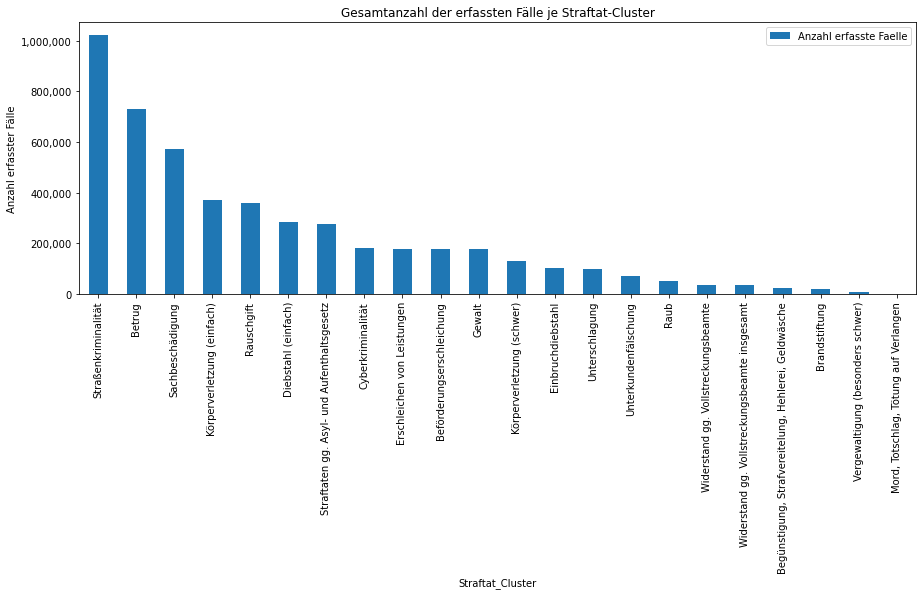

In [338]:
# Anzahl erfasster Fälle je Straftat-Cluster
 
df_1 = pd.DataFrame(df.groupby('Straftat_Cluster')["Anzahl erfasste Faelle"].sum()).sort_values('Anzahl erfasste Faelle', ascending=False)

ax = df_1.plot.bar(rot=90,figsize=(15,5),title='Gesamtanzahl der erfassten Fälle je Straftat-Cluster')
ax.set_ylabel('Anzahl erfasster Fälle')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


#### Aufklärungsquote je Straftat-Cluster

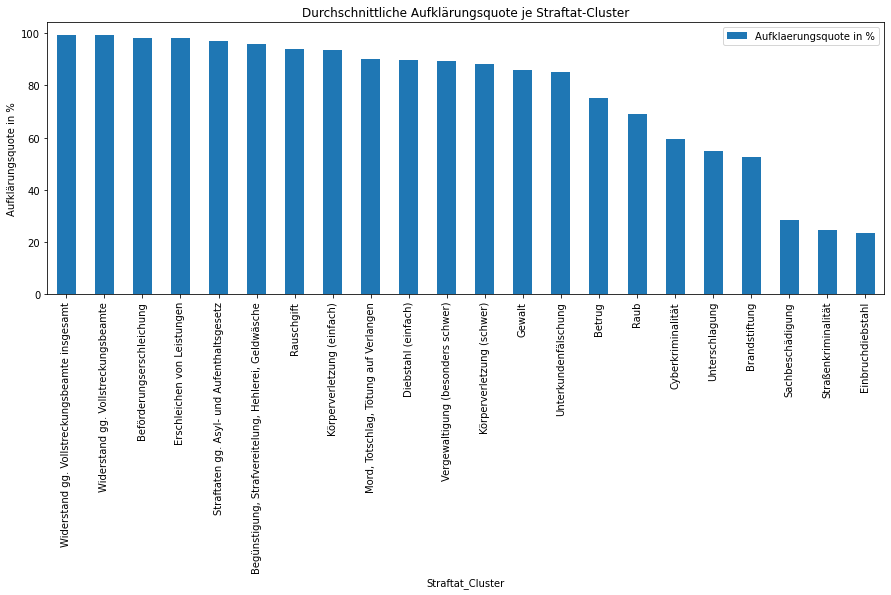

In [6]:
# Aufklärungsquote je Straftat-Cluster

df_2 = pd.DataFrame(df.fillna(np.inf).groupby('Straftat_Cluster')["Aufklaerungsquote in %"].mean()).sort_values('Aufklaerungsquote in %', ascending=False)

ax = df_2.plot.bar(rot=90,figsize=(15,5),title='Durchschnittliche Aufklärungsquote je Straftat-Cluster')
ax.set_ylabel('Aufklärungsquote in %')
plt.show()

In [340]:
# Vergleich Anzahl erfasster Fälle mit Aufklärungsquote zur Gesamtanzahl erfasster Fälle

a = 50
c = 80
d = 90

df_3 = df.loc[(df['Aufklaerungsquote in %'])>a]
df_4 = df.loc[(df['Aufklaerungsquote in %'])>c]
df_5 = df.loc[(df['Aufklaerungsquote in %'])>d]


print('Anteil erfasster Fälle mit Aufklärungsquote > '+ str(a) + ' %' +' an Gesamt erfassten Fällen im Jahr 2020: ' + str((round((df_3['Anzahl erfasste Faelle'].sum()/df['Anzahl erfasste Faelle'].sum())*100)))+' %')
print('Anteil erfasster Fälle mit Aufklärungsquote > '+ str(c) + ' %' +' an Gesamt erfassten Fällen im Jahr 2020: ' + str((round((df_4['Anzahl erfasste Faelle'].sum()/df['Anzahl erfasste Faelle'].sum())*100)))+' %')
print('Anteil erfasster Fälle mit Aufklärungsquote > '+ str(d) + ' %' +' an Gesamt erfassten Fällen im Jahr 2020: ' + str((round((df_5['Anzahl erfasste Faelle'].sum()/df['Anzahl erfasste Faelle'].sum())*100)))+' %')

Anteil erfasster Fälle mit Aufklärungsquote > 50 % an Gesamt erfassten Fällen im Jahr 2020: 59 %
Anteil erfasster Fälle mit Aufklärungsquote > 80 % an Gesamt erfassten Fällen im Jahr 2020: 46 %
Anteil erfasster Fälle mit Aufklärungsquote > 90 % an Gesamt erfassten Fällen im Jahr 2020: 30 %


#### Anzahl erfasste Fälle: Top Cluster nach Kreis / Stadt

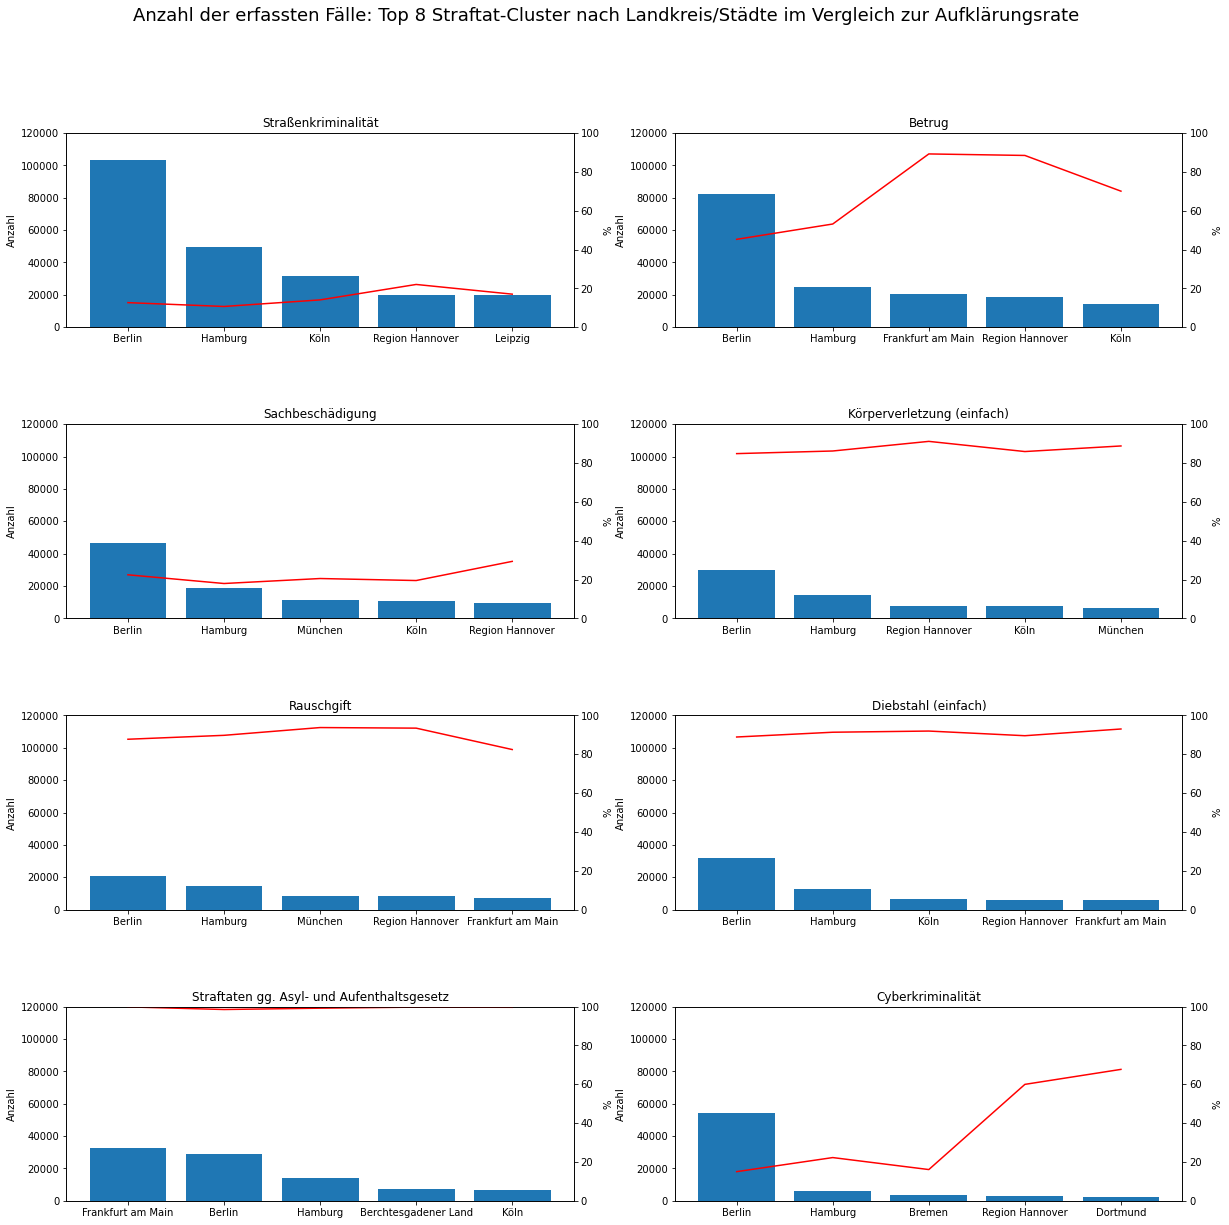

In [8]:
# Anzahl der erfassten Fälle: Top Cluster nach Landkreis/Städte

## Preparation
straftat_top = df_1.reset_index(drop=False).head(8)
straftat_top_list = straftat_top['Straftat_Cluster'].tolist()
top_list_len = len(straftat_top_list)

df_small = df[['Straftat_Cluster','Stadt-/Landkreis','Anzahl erfasste Faelle','Aufklaerungsquote in %']].sort_values('Anzahl erfasste Faelle',ascending=False)
df_straftat_landkreis = df_small.groupby(['Straftat_Cluster'],sort=False).head(5)

df_straftat_landkreis_top_5 = df_straftat_landkreis[df_straftat_landkreis['Straftat_Cluster'].isin(straftat_top_list)]


## Plot

plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Anzahl der erfassten Fälle: Top '+ str(top_list_len) + ' Straftat-Cluster nach Landkreis/Städte im Vergleich zur Aufklärungsrate', fontsize=18, y=0.95)


for n,straftat_top_list in enumerate(straftat_top_list):
    ax1 = plt.subplot(5,2,n+1)
    ax2 = ax1.twinx()
    
    df0=df_straftat_landkreis_top_5[df_straftat_landkreis_top_5['Straftat_Cluster']==straftat_top_list]
    
    ax1.bar(df0['Stadt-/Landkreis'],df0['Anzahl erfasste Faelle'])
    ax2.plot(df0['Stadt-/Landkreis'],df0['Aufklaerungsquote in %'],color='red')
    
    ax1.set_title(straftat_top_list)
    ax1.set_ylabel("Anzahl")
    ax2.set_ylabel('%')
    ax1.set_ylim([0,120000])
    ax2.set_ylim([0,100])

plt.show()

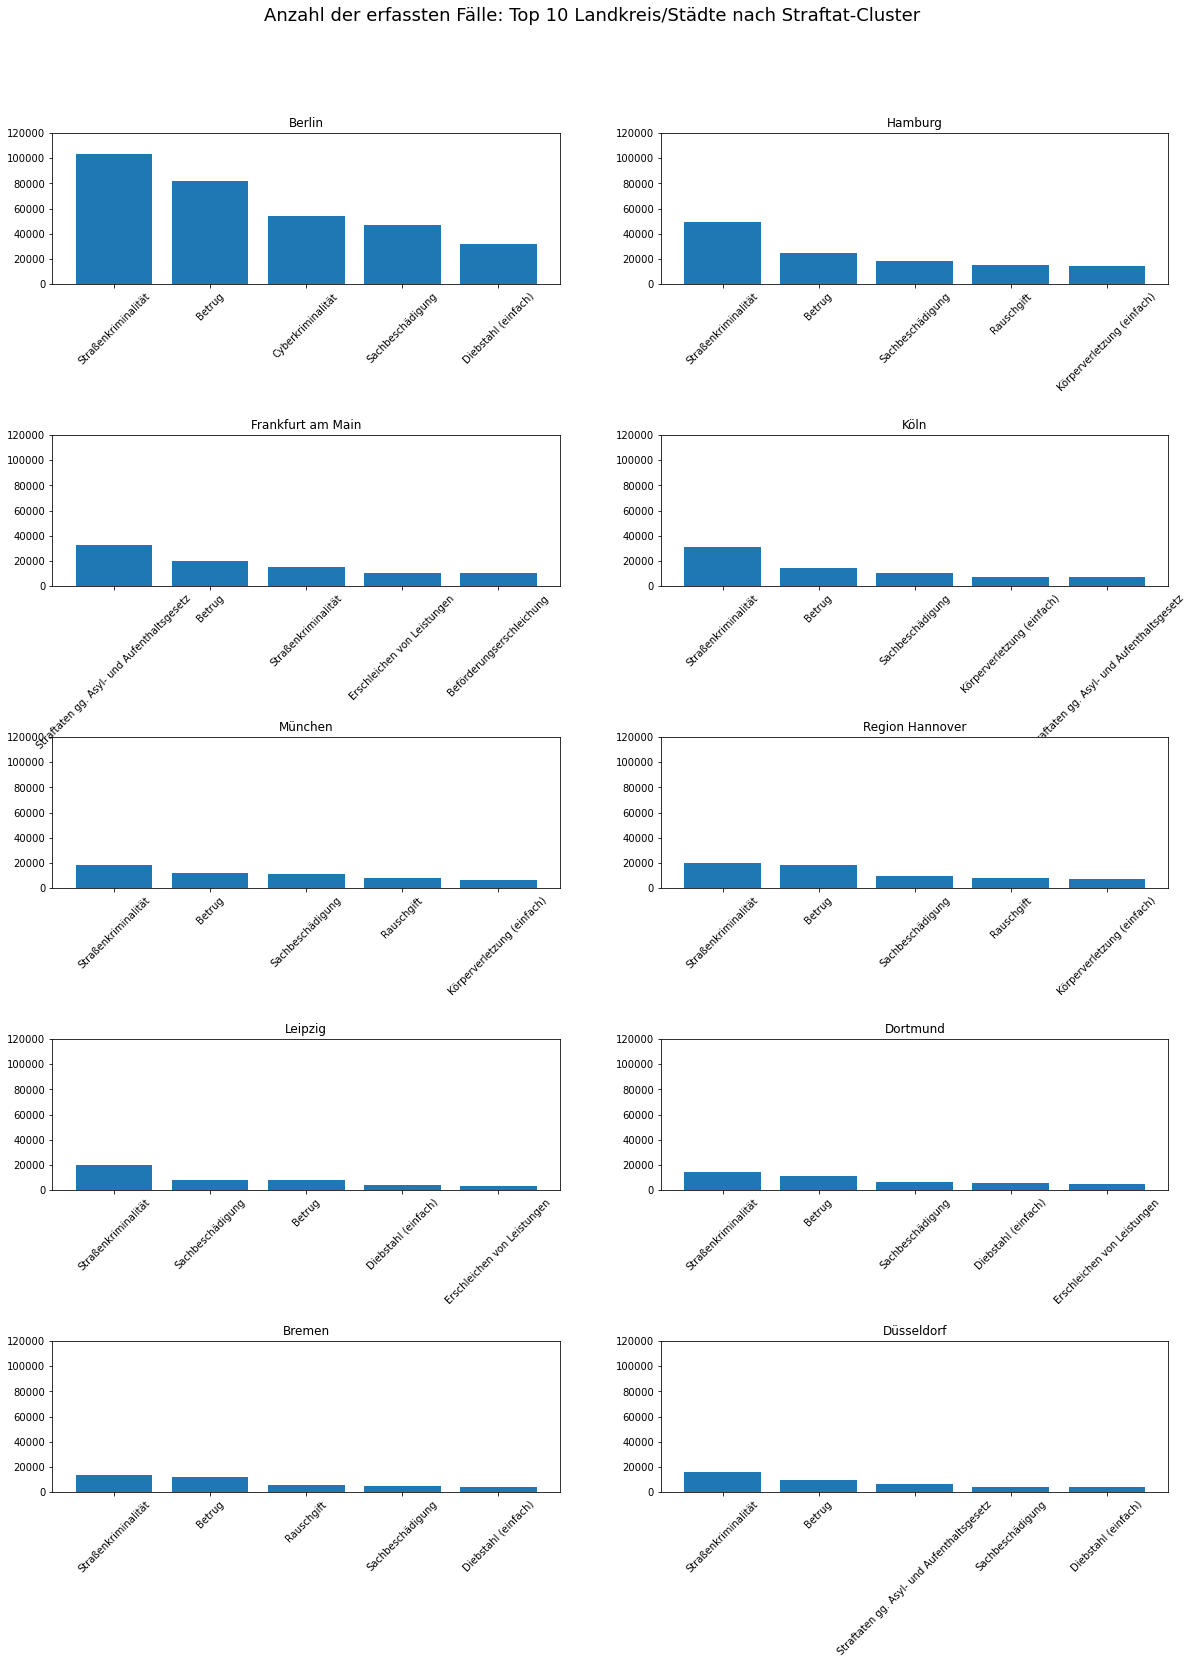

In [9]:
# Anzahl der erfassten Fälle: Top Landkreis/Städte nach Straftat-Cluster

## Preparation
df_landkreis = pd.DataFrame(df.groupby('Stadt-/Landkreis')["Anzahl erfasste Faelle"].sum()).sort_values('Anzahl erfasste Faelle', ascending=False)

landkreis_top = df_landkreis.reset_index(drop=False).head(10)
landkreis_top_list = landkreis_top['Stadt-/Landkreis'].tolist()
top_list_len = len(landkreis_top_list)

df_small1 = df[['Stadt-/Landkreis','Straftat_Cluster','Anzahl erfasste Faelle']].sort_values('Anzahl erfasste Faelle',ascending=False)
df_straftat_landkreis = df_small1.groupby(['Stadt-/Landkreis'],sort=False).head(5)

df_landkreis_straftat_top_10 = df_straftat_landkreis[df_straftat_landkreis['Stadt-/Landkreis'].isin(landkreis_top_list)]


## Plot

plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=1)
plt.suptitle('Anzahl der erfassten Fälle: Top '+ str(top_list_len)+ ' Landkreis/Städte nach Straftat-Cluster', fontsize=18, y=0.95)


for n, landkreis_top_list in enumerate(landkreis_top_list):
    ax = plt.subplot(5,2,n+1)
    
    df0=df_landkreis_straftat_top_10[df_landkreis_straftat_top_10['Stadt-/Landkreis']==landkreis_top_list]
    
    ax.bar(df0['Straftat_Cluster'],df0['Anzahl erfasste Faelle'])
    ax.set_title(landkreis_top_list)
    ax.set_xlabel("")
    ax.set_ylim([0,120000])
    ax.tick_params('x',labelrotation=45) 
    
plt.show()

### Data Exploration - Fokus: Absolventen (Berufsschule und allgemeinbildende Schulen)

In [41]:
# Allgemeine Infos 

df_absolventen = df.iloc[list(df['Straftat_Cluster']=='Straßenkriminalität'),17:40]

df_absolventen.describe()

,Berufl. Absolventen Anzahl insgesamt,Berufl. Absolventen Anzahl weiblich,Berufl. Absolventen Anzahl mit Hauptschulabschluss insgesamt,Berufl. Absolventen Anzahl mit Hauptschulabschluss weiblich,Berufl. Absolventen Anzahl mit mittlerem Abschluss insgesamt,Berufl. Absolventen Anzahl mit mittlerem Abschluss weiblich,Berufl. Absolventen Anzahl mit Fachhochschulreife insgesamt,Berufl. Absolventen Anzahl mit Fachhochschulreife weiblich,Berufl. Absolventen Anzahl mit allg. Hochschulreife einschl. fachgeb. Hochschulreife insgesamt,Allg. Absolventen Anzahl insgesamt,...,Allg. Absolventen Anzahl mit Hauptschulabschluss Insgesamt,Allg. Absolventen Anzahl mit Hauptschulabschluss weiblich,Allg. Absolventen Anzahl mit mittlerer Reife Insgesamt,Allg. Absolventen Anzahl mit mittlerer Reife weiblich,Allg. Absolventen Anzahl mit schulischen Teil der Fachhochschulreife Insgesamt,Allg. Absolventen Anzahl mit schulischen Teil der Fachhochschulreife weiblich,Allg. Absolventen Anzahl mit Fachhochschulreife Insgesamt,Allg. Absolventen Anzahl mit Fachhochschulreife weiblich,Allg. Absolventen Anzahl mit allg. Hochschulreife Insgesamt,Allg. Absolventen Anzahl mit allg. Hochschulreife weiblich
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,...,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,630.142145,301.985037,122.077307,45.885287,173.980050,84.019950,207.501247,102.700748,139.685786,1855.364090,...,299.895262,119.124688,826.551122,401.094763,49.017456,23.521197,8.985037,3.832918,617.199501,338.970075
std,698.200625,326.519915,154.999037,59.436368,233.793252,115.340364,239.848172,110.610195,157.374572,2048.160585,...,300.018214,121.016691,753.833637,355.087540,75.059658,34.541427,8.496457,4.465928,938.698304,512.266580
min,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,203.000000,...,47.000000,17.000000,91.000000,47.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,230.000000,108.000000,36.000000,12.000000,52.000000,25.000000,74.000000,40.000000,45.000000,933.000000,...,151.000000,59.000000,426.000000,213.000000,9.000000,5.000000,0.000000,0.000000,218.000000,124.000000
50%,432.000000,205.000000,71.000000,27.000000,109.000000,54.000000,151.000000,75.000000,85.000000,1338.000000,...,226.000000,90.000000,644.000000,315.000000,27.000000,13.000000,12.000000,4.000000,381.000000,207.000000
75%,804.000000,392.000000,141.000000,56.000000,220.000000,110.000000,246.000000,126.000000,170.000000,2136.000000,...,351.000000,144.000000,989.000000,480.000000,61.000000,30.000000,14.000000,7.000000,745.000000,395.000000
max,7706.000000,3521.000000,1487.000000,604.000000,2842.000000,1469.000000,2217.000000,1089.000000,1287.000000,29455.000000,...,3660.000000,1468.000000,10327.000000,4822.000000,837.000000,353.000000,56.000000,25.000000,13431.000000,7318.000000


#### Verteilung der beruflichen Absolventen

<AxesSubplot:title={'center':'Werteverteilung der Anzahl der beruflichen Absolventen je Kreis'}>

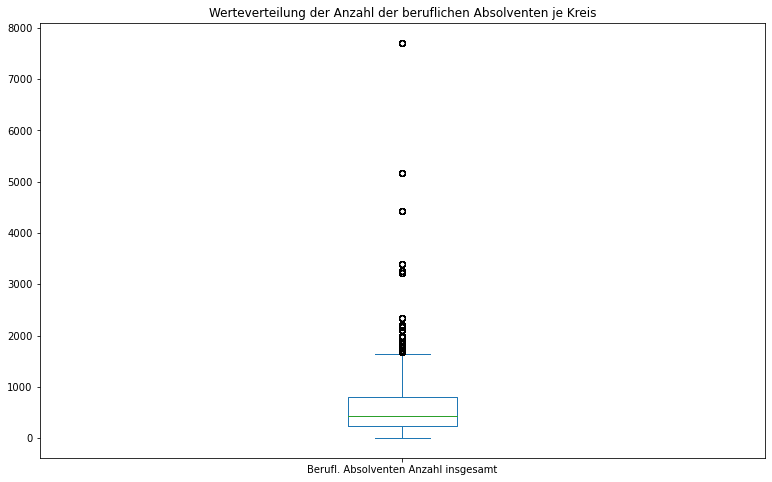

In [24]:
# Verteilung berufliche Absolventen

df[['Berufl. Absolventen Anzahl insgesamt']].plot(kind = 'box', figsize = [13,8],
                                                 title = 'Werteverteilung der Anzahl der beruflichen Absolventen je Kreis')

Erkenntnis:

Die Anzahl der beruflichen Absolventen je Kreis hat einen relativ großen Wertebereich. Jedoch lassen sich Kreise mit mehr als 2.000 Absolventen als Ausreißer festhalten. Es handelt sich daher um eine sehr stark rechtsschiefe Verteilung. Die Spanne der Absolventen reicht von 0 bis hin zu knapp unter 2.000. 

#### Durchschnittliche Anzahl beruflicher Absolventen je Bundesland

<AxesSubplot:title={'center':'Durchschnittliche Anzahl beruflicher Absolventen je deutsches Bundesland im Jahr 2020'}, xlabel='Bundesland'>

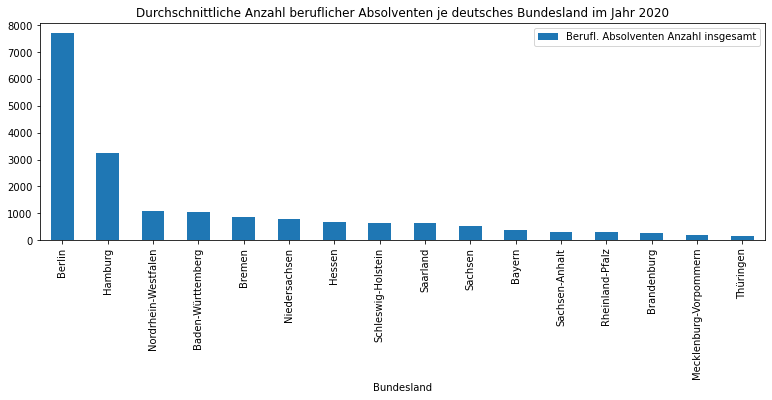

In [28]:
# Durchschnittliche Anzahl beruflicher Absolventen je Bundesland

absolventen_beruf_bundes = df[['Bundesland','Berufl. Absolventen Anzahl insgesamt']].groupby('Bundesland').mean().reset_index()\
                            .sort_values('Berufl. Absolventen Anzahl insgesamt', ascending = False)

absolventen_beruf_bundes.plot(kind='bar', x = 'Bundesland', y='Berufl. Absolventen Anzahl insgesamt',
                             title = 'Durchschnittliche Anzahl beruflicher Absolventen je deutsches Bundesland im Jahr 2020',
                             figsize = [13,4])

Erkenntnis:

Trotz einer hohen Arbeitslosenanzahl (siehe Kapitel 4.4.2) besitzen Berlin und Hambrug die mit Abstand meisten beruflichen Absolventen im Jahr 2020. 

Auf den ersten Blick kann damit auch ein Zusammenhang mit einer hohen Kriminalitätsrate ausgeschlossen werden, da Berlin und Hamburg hier ebenfalls vorne liegen (vgl. 4.1.6)

#### Kriminalitätsrate je Kreisgebiet in Abhängigkeit zu beruflichen Absolventen pro Kopf

<AxesSubplot:title={'center':'Kriminalitätsrate je Kreis in Abhängigkeit beruflichen Absolventenanzahl pro Kopf je Kreis'}, xlabel='Absolventen beruflich pro Kopf', ylabel='Kriminalitätsrate'>

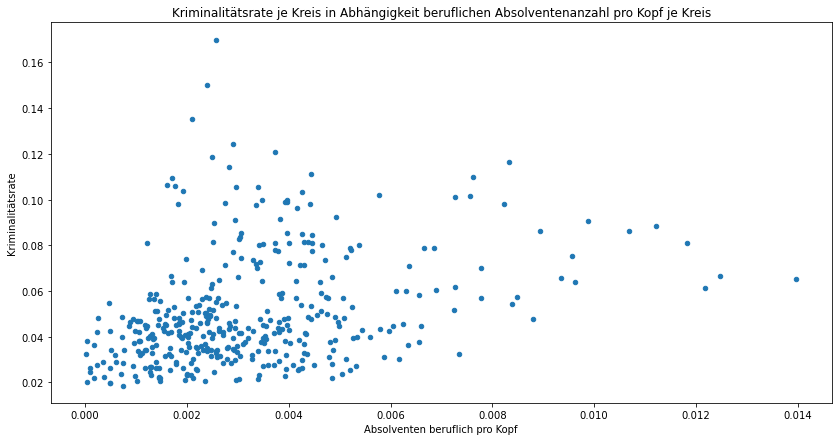

In [33]:
# Kriminalitätsrate vs. Absolventenanzahl

absolventen_kreis = df[['Kreis_ID','Berufl. Absolventen Anzahl insgesamt','Bevölkerung insgesamt']].groupby('Kreis_ID').mean().reset_index()
absolventen_kreis['Absolventen beruflich pro Kopf'] = absolventen_kreis['Berufl. Absolventen Anzahl insgesamt'] / absolventen_kreis['Bevölkerung insgesamt']
fallzahlen_kreis = df[['Kreis_ID', 'Anzahl erfasste Faelle']].groupby('Kreis_ID').sum().reset_index()
absolventen_krimi_kreis = pd.merge(fallzahlen_kreis, absolventen_kreis, on = 'Kreis_ID', how = 'inner')
absolventen_krimi_kreis['Kriminalitätsrate'] = absolventen_krimi_kreis['Anzahl erfasste Faelle'] / absolventen_krimi_kreis['Bevölkerung insgesamt']

absolventen_krimi_kreis.plot(kind='scatter', x='Absolventen beruflich pro Kopf', y = 'Kriminalitätsrate',
                            title = 'Kriminalitätsrate je Kreis in Abhängigkeit beruflichen Absolventenanzahl pro Kopf je Kreis',
                            figsize = [14,7])

Um die unterschiedlichen Bevölkerungsanzahlen der Kreisgebiete bei der Betrachtung der Absolventenanzahl zu berücksichtigen, wird eine Absolventenanzahl pro Kopf je Kreis berechnet.

Erkenntnis:

Wie bereits im vorherigen Absatz vermutet, kann nur ein geringer bis gar kein Zusammenhang zwischen der Absolventenanzahl je Kreis und der Kriminalitätsrate abgeleitet werden.

Es sind sowohl bei niedrigen als auch bei höheren Absolventenzahlen ebenso hohe Kriminalitätsraten zu erkennen.

#### Verteilung der allgemeinen / schulischen Absolventen

<AxesSubplot:title={'center':'Verteilung der allgemeinen, schulischen Absolventen je Kreisgebiet'}, ylabel='Frequency'>

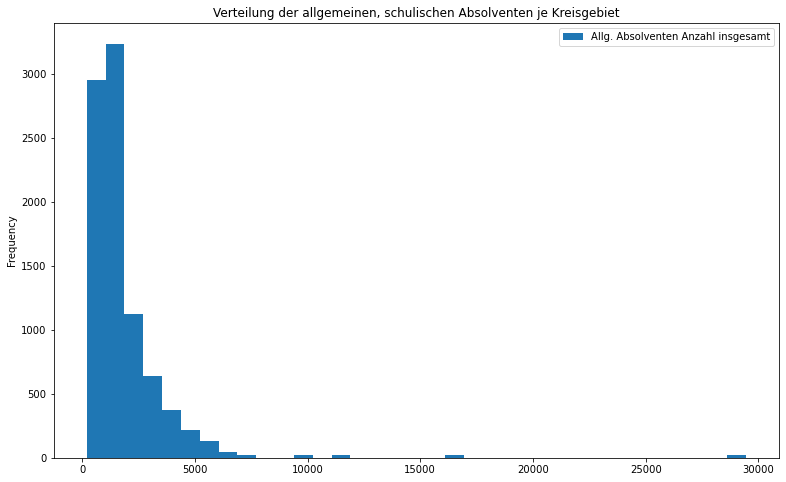

In [40]:
# Verteilung schulische Absolventen

df[['Allg. Absolventen Anzahl insgesamt']].plot(kind = 'hist', figsize = [13,8], bins = 35,
                                                 title = 'Verteilung der allgemeinen, schulischen Absolventen je Kreisgebiet')

Erkenntnis:

Starke Rechtsschiefe Verteilung, bei der ein Mittelwert zwischen 0 und 5.000 Absolventen liegt. Es existieren einige wenige Ausreißer mit Absolventenzahlen nahe 30.000 Schülerinnen und Schüler.

#### Anzahl der schulischen Absolventen je Schulart insgesamt

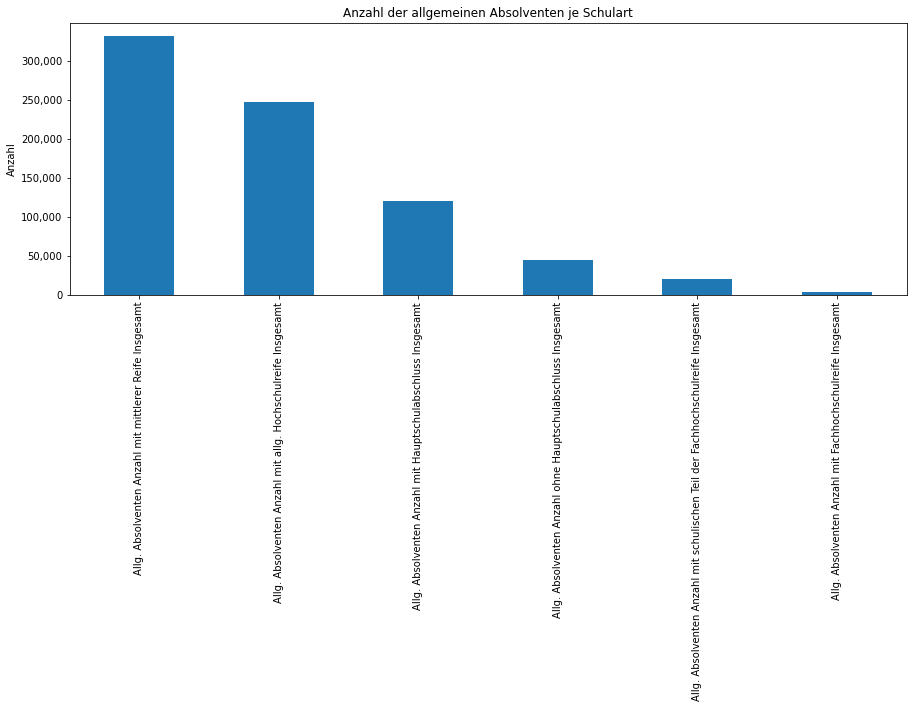

In [48]:
# Gesamt allgemeine Absolventen je Schulart

df_absolventen = df.iloc[list(df['Straftat_Cluster']=='Straßenkriminalität'),17:40]

df_chart_allgemein = df_absolventen.iloc[:,11:25:2].sum().sort_values(ascending=False)

df_chart_allgemein.head(20)

ax = df_chart_allgemein.plot.bar(rot=90,figsize=(15,5),title='Anzahl der allgemeinen Absolventen je Schulart')
ax.set_ylabel('Anzahl')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

Erkenntnis:

Die meisten schulischen Absolventen entstammen dem Gymnasium, gefolgt von Hauptschulabschlüssen. Auffallend hoch ist auch die Anzahl derjenigen ohne jeglichen Abschluss (ca. 50.000). Der geringe Anteil der Fachhochschulreife resultiert wohl daraus, dass dieser Bildungsweg nur in einigen wenigen Bundesländern angeboten wird.

#### Kriminalitätsrate im Vergleich zur Anzahl der schulischen Absolventen pro Kopf je Kreis

<AxesSubplot:title={'center':'Kriminalitätsrate je Kreis in Abhängigkeit schulischer Absolventenanzahl pro Kopf je Kreis'}, xlabel='Absolventen schulisch pro Kopf', ylabel='Kriminalitätsrate'>

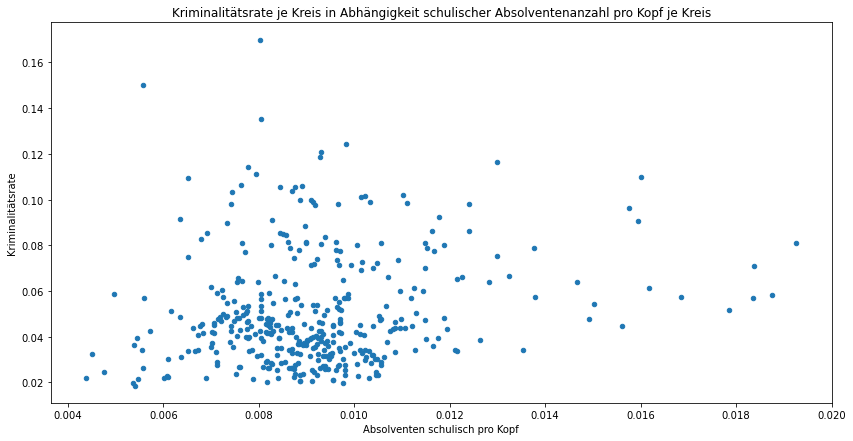

In [56]:
#Kriminalitätsrate im Vergleich zur Anzahl der schulischen Absolventen pro Kopf je Kreis

absolventen_allg_kreis = df[['Kreis_ID','Allg. Absolventen Anzahl insgesamt','Bevölkerung insgesamt']].groupby('Kreis_ID').mean().reset_index()
absolventen_allg_kreis['Absolventen schulisch pro Kopf'] = absolventen_allg_kreis['Allg. Absolventen Anzahl insgesamt'] / absolventen_allg_kreis['Bevölkerung insgesamt']

absolventen_allg_krimi_kreis = pd.merge(fallzahlen_kreis, absolventen_allg_kreis, on = 'Kreis_ID', how = 'inner')
absolventen_allg_krimi_kreis['Kriminalitätsrate'] = absolventen_allg_krimi_kreis['Anzahl erfasste Faelle'] / absolventen_allg_krimi_kreis['Bevölkerung insgesamt']

absolventen_allg_krimi_kreis.plot(kind='scatter', x='Absolventen schulisch pro Kopf', y = 'Kriminalitätsrate',
                            title = 'Kriminalitätsrate je Kreis in Abhängigkeit schulischer Absolventenanzahl pro Kopf je Kreis',
                            figsize = [14,7])

Erkenntnis:

Auch zwischen der Kriminalitätsrate und den Zahlen der schulischen Absolventen im Jahr 2020 lässt sich nur ein wenig aussagekräftiger Zusammenhang erkennen.

Eine leichte Tendenz (negativer Zusammenhang) kann zwar erahnt werden, jedoch reicht diese nicht aus, um einen eindeutigen Zusammenhang feststellen zu können, da ab ca. 0.008 Absolventen pro Kopf die Streuung enorm zunimmt.

#### Berufliche Absolventen je Vorabschluss

In [18]:
# Gesamt Berufliche Absolventen je Vorabschluss

df_chart = df_absolventen.iloc[:,0:10:2].sum().sort_values(ascending=False)

df_chart.head(20)

ax = df_chart.plot.bar(rot=90,figsize=(15,5),title='Anzahl der beruflichen Absolventen je Vorabschluss')
ax.set_ylabel('Anzahl')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


NameError: name 'df_absolventen' is not defined

#### Berufliche Absolventen je Vorbildung und Bundesland

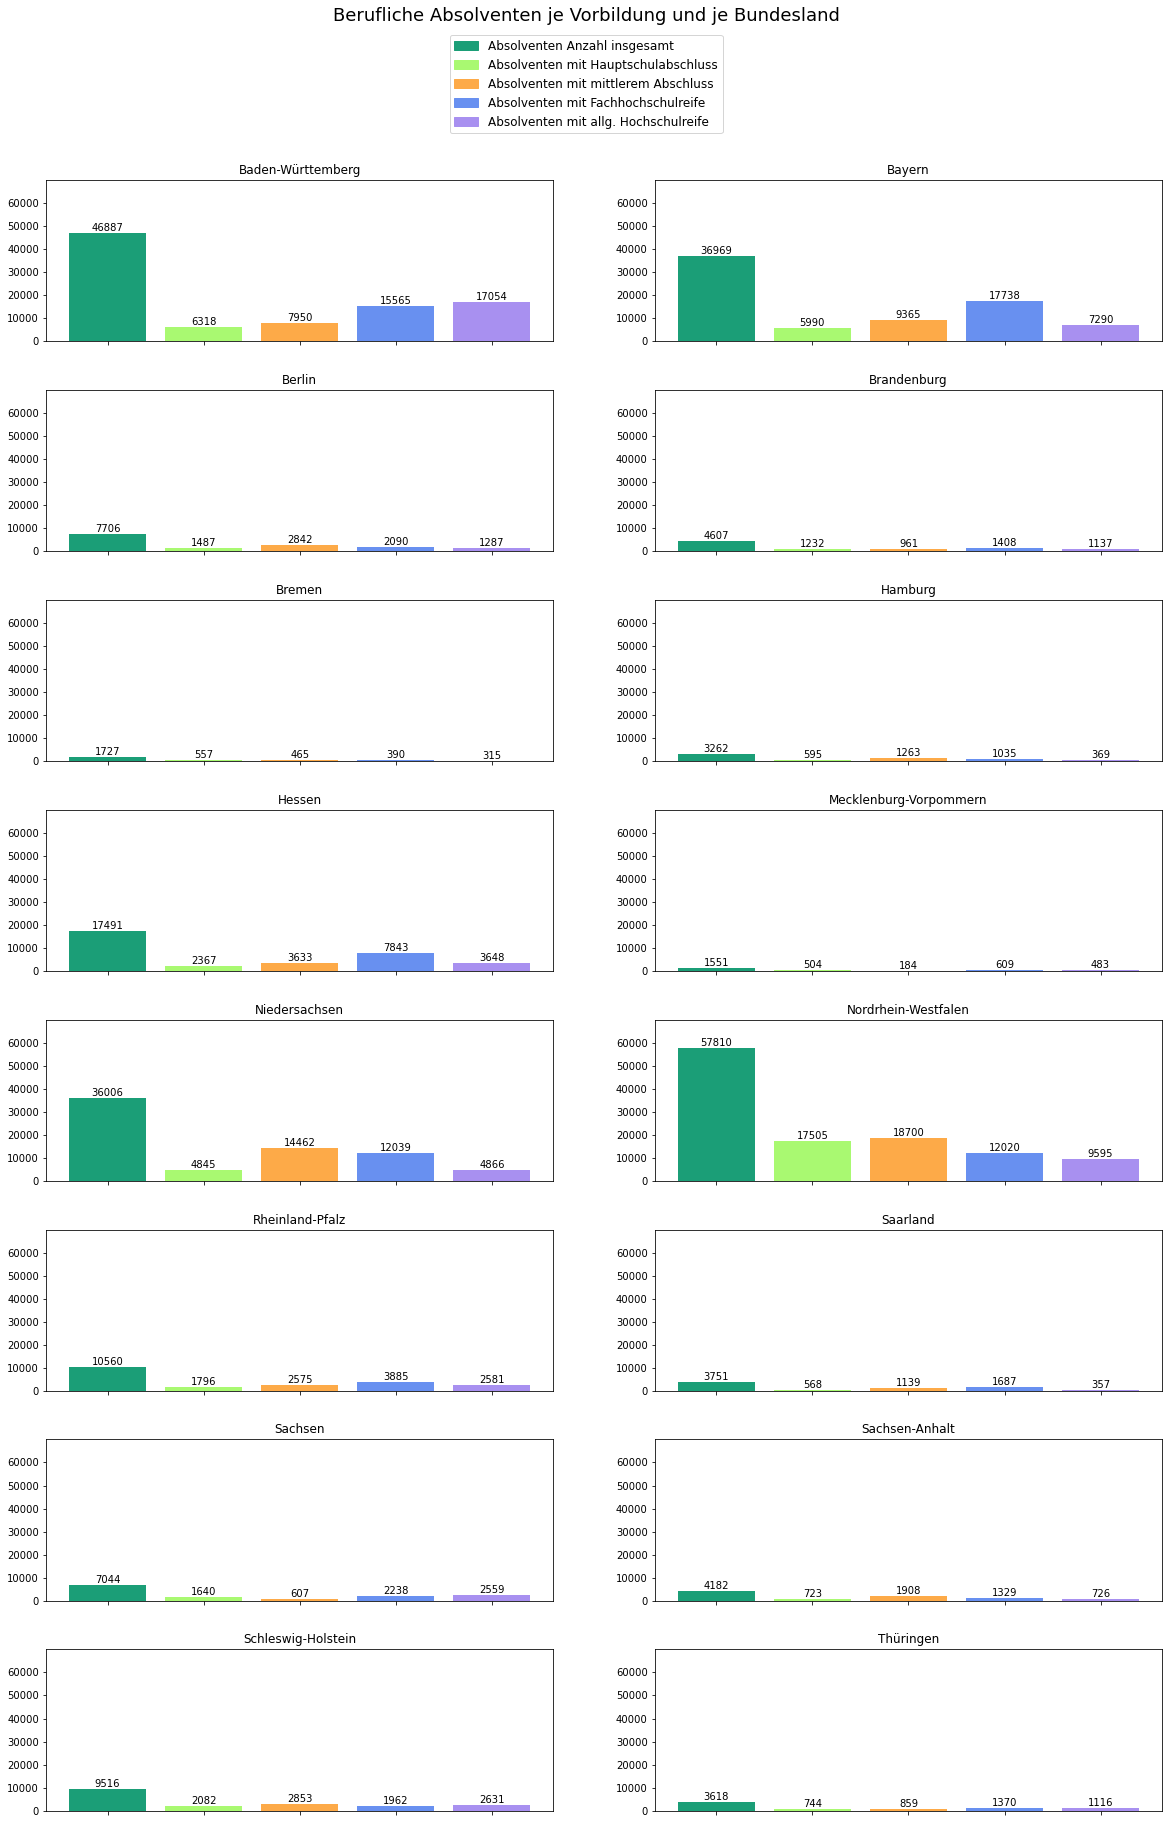

In [17]:
# Gesamt berufliche Absolventen je Vorbildung und Bundesland

df_absolventen_beruf_land_bund = df[['Stadt-/Landkreis',
                           'Bundesland',
                           'Berufl. Absolventen Anzahl insgesamt',
                          'Berufl. Absolventen Anzahl weiblich',
                          'Berufl. Absolventen Anzahl mit Hauptschulabschluss insgesamt',
                          'Berufl. Absolventen Anzahl mit Hauptschulabschluss weiblich',
                          'Berufl. Absolventen Anzahl mit mittlerem Abschluss insgesamt',
                          'Berufl. Absolventen Anzahl mit mittlerem Abschluss weiblich',
                          'Berufl. Absolventen Anzahl mit Fachhochschulreife insgesamt',
                          'Berufl. Absolventen Anzahl mit Fachhochschulreife weiblich',
                          'Berufl. Absolventen Anzahl mit allg. Hochschulreife einschl. fachgeb. Hochschulreife insgesamt']].drop_duplicates()

df_absolventen_beruf_bund = pd.DataFrame(df_absolventen_beruf_land_bund.groupby('Bundesland').sum()).reset_index(drop=False)

df_absolventen_beruf_bund_1 = df_absolventen_beruf_bund.iloc[:,[0,1,3,5,7,9]]

df_absolventen_beruf_bund_2 = df_absolventen_beruf_bund_1.set_index(['Bundesland']).unstack().reset_index()

df_absolventen_beruf_bund_2.rename(columns={'level_0':'Kategorie',0:'Anzahl'},inplace=True)

df_absolventen_beruf_bund_list = df_absolventen_beruf_bund['Bundesland'].tolist()

df_legend_list = df_absolventen_beruf_bund_1.iloc[:,1:6].columns.tolist()

## Plot

fig,axs = plt.subplots(figsize=(20,30))
plt.subplots_adjust(hspace=0.3)
plt.suptitle('Berufliche Absolventen je Vorbildung und je Bundesland', fontsize=18, y=0.96)

leg_1 = mpatches.Patch(color = '#1b9e77',label='Absolventen Anzahl insgesamt')
leg_2 = mpatches.Patch(color = '#a9f971',label='Absolventen mit Hauptschulabschluss')
leg_3 = mpatches.Patch(color = '#fdaa48',label='Absolventen mit mittlerem Abschluss')
leg_4 = mpatches.Patch(color = '#6890F0',label='Absolventen mit Fachhochschulreife')
leg_5 = mpatches.Patch(color = '#A890F0',label='Absolventen mit allg. Hochschulreife')

for n, i in enumerate(df_absolventen_beruf_bund_list):
    ax = plt.subplot(8,2,n+1)
    df0=df_absolventen_beruf_bund_2[df_absolventen_beruf_bund_2.Bundesland==i]
    colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']

    x = df0['Kategorie']
    y = df0['Anzahl']
    
    pp = ax.bar(x,y,color=colors)
    for p in pp:
        height = p.get_height()
        ax.annotate('{}'.format(height),
          xy=(p.get_x() + p.get_width() / 2, height),
          ha='center', va='bottom')
    
    ax.set_title(i)
    ax.set_xlabel("")
    ax.set_ylim([0,70000])
    plt.tick_params('x',labelbottom=False)
    plt.yticks(np.arange(0, 70000, 10000.0))
    
    
fig.legend(handles=[leg_1,leg_2,leg_3,leg_4,leg_5], loc="upper center", markerscale=0.9, scatterpoints=1, fontsize=12,bbox_to_anchor=(0.5, 0.95))
plt.show()

#### Vergleich berufliche Absolventen je Vorbildung mit Anzahl der erfassten Fälle

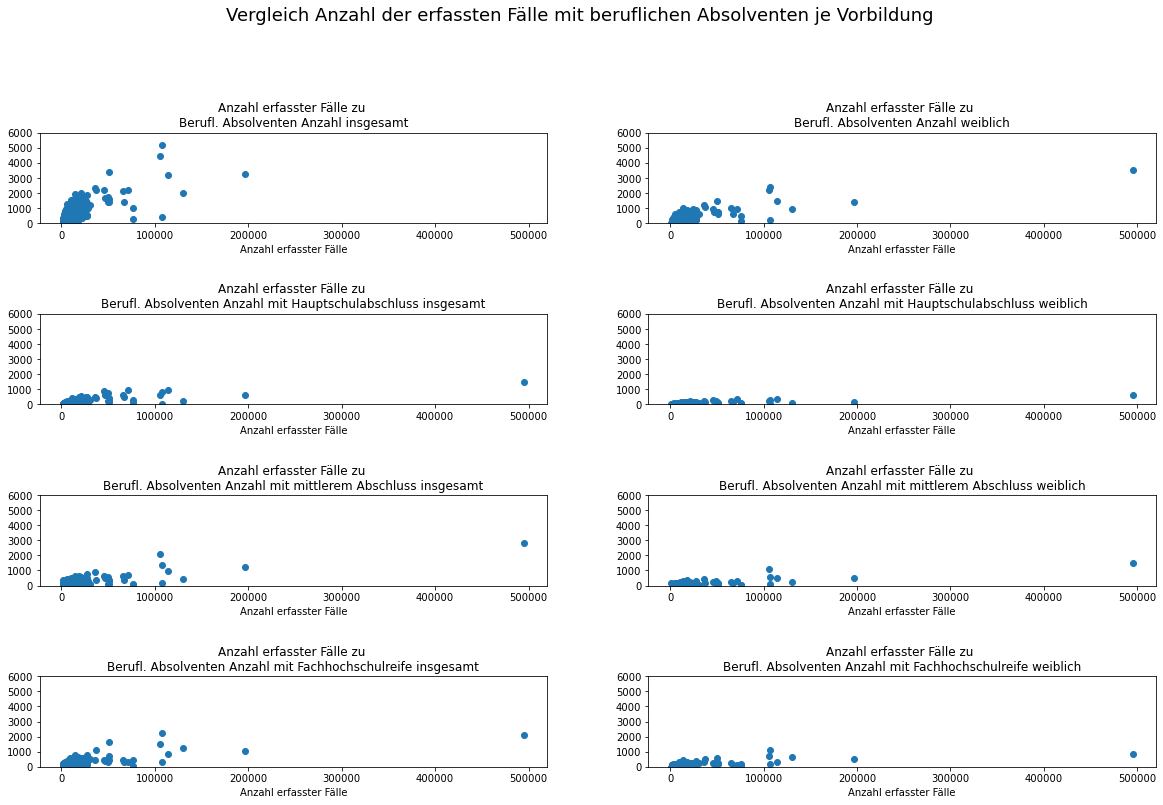

In [171]:
# Vergleich berufliche Absolventen je Vorbildung mit Anzahl der erfassten Fälle

df_landkreis_1 = df_landkreis.reset_index(drop=False)
df_absolventen_beruf_landkreis = pd.merge(df_absolventen_beruf_land_bund,df_landkreis_1,on=['Stadt-/Landkreis'])

df_absolventen_beruf_list = df_absolventen_beruf_landkreis.iloc[:,2:10]

## Plot

count=1
plt.subplots(figsize=(20, 25))
plt.subplots_adjust(hspace=1)
plt.suptitle('Vergleich Anzahl der erfassten Fälle mit beruflichen Absolventen je Vorbildung', fontsize=18, y=0.95)

for i in df_absolventen_beruf_list.columns:
    ax = plt.subplot(8,2,count)
    x = df_absolventen_beruf_landkreis['Anzahl erfasste Faelle']
    y = df_absolventen_beruf_landkreis[i]
    plt.scatter(x,y)
    
    ax.set_xlabel('Anzahl erfasster Fälle')
    ax.set_title('Anzahl erfasster Fälle zu '+'\n'+i)
    ax.set_ylim([0,6000])
    plt.yticks(np.arange(0, 6500, 1000.0))
    count+=1

plt.show()

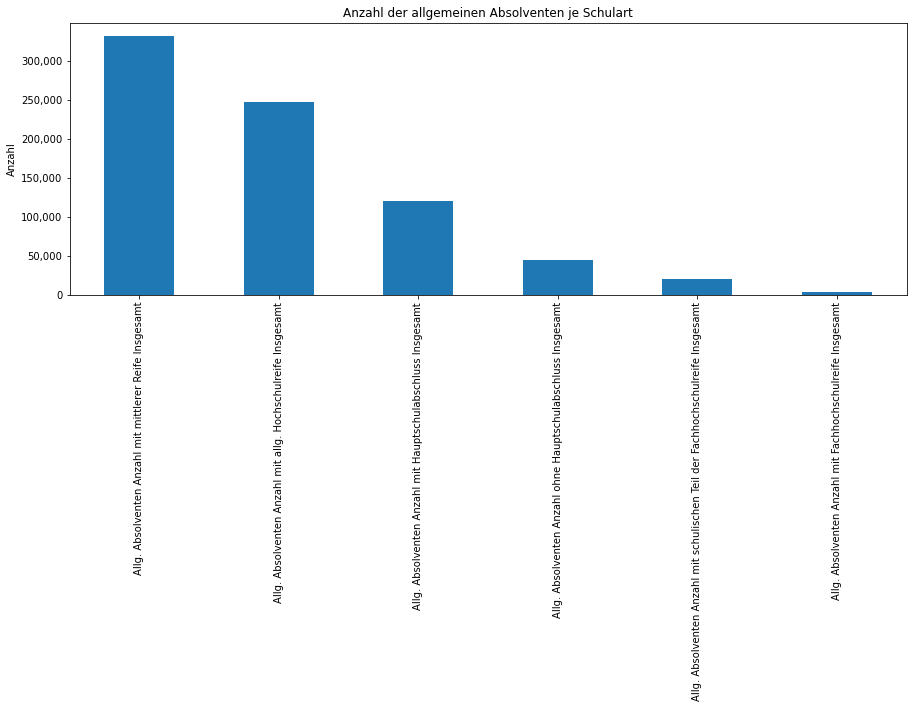

#### Vergleich allgemeine Absolventen je Schulrichtung mit Anzahl der erfassten Fälle

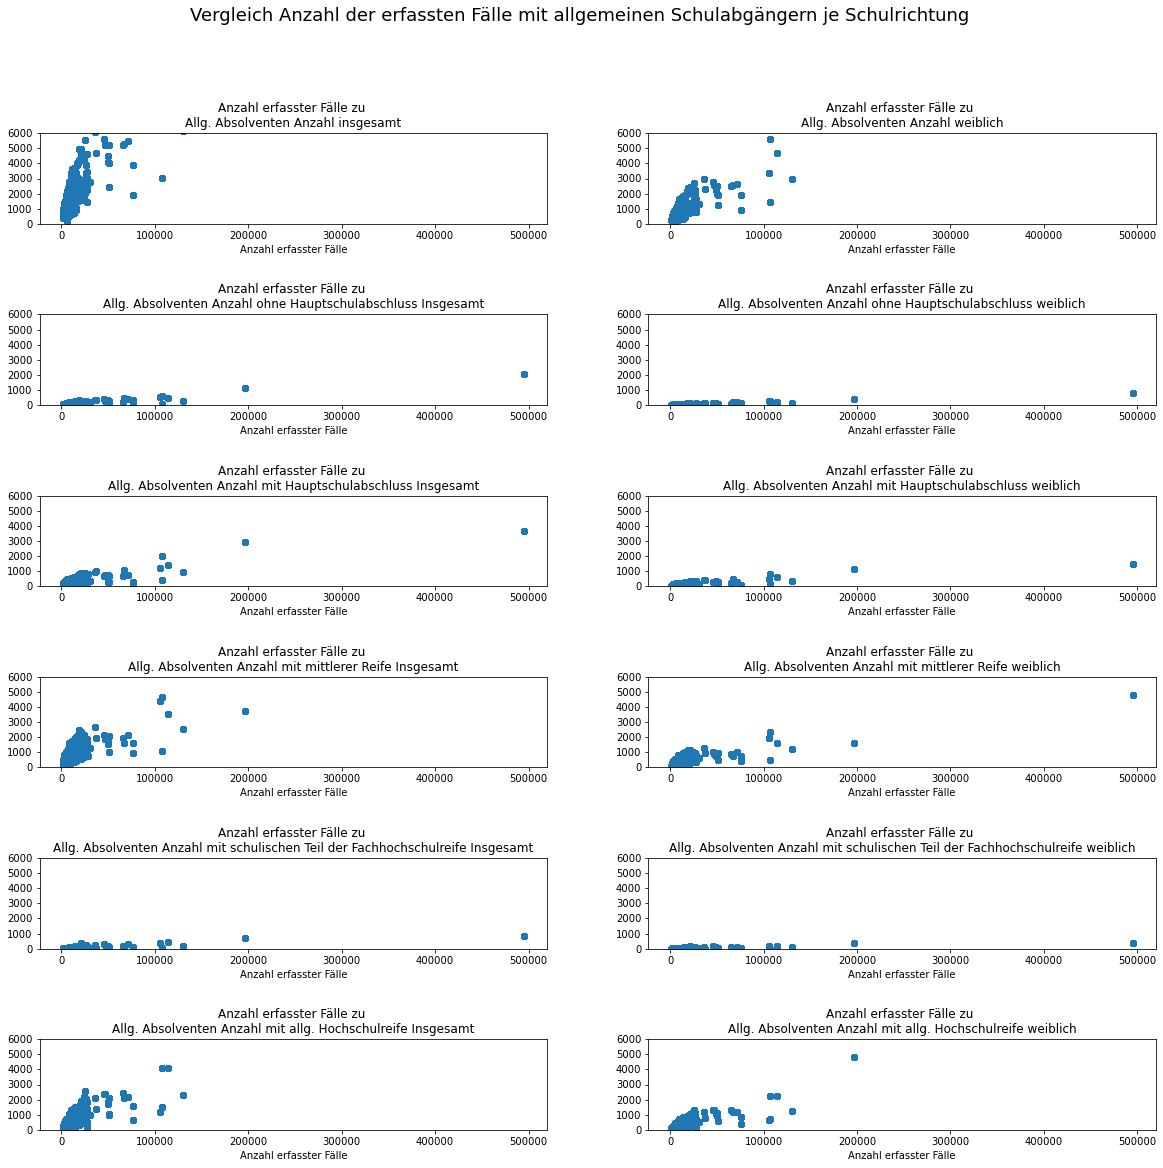

In [15]:
# Vergleich allgemeine Absolventen je Schulrichtung mit Anzahl der erfassten Fälle

df_absolventen_allgemein = df[['Stadt-/Landkreis',
                           'Allg. Absolventen Anzahl insgesamt',
                           'Allg. Absolventen Anzahl weiblich',
                           'Allg. Absolventen Anzahl ohne Hauptschulabschluss Insgesamt',
                           'Allg. Absolventen Anzahl ohne Hauptschulabschluss weiblich',
                           'Allg. Absolventen Anzahl mit Hauptschulabschluss Insgesamt',
                           'Allg. Absolventen Anzahl mit Hauptschulabschluss weiblich',
                           'Allg. Absolventen Anzahl mit mittlerer Reife Insgesamt',
                           'Allg. Absolventen Anzahl mit mittlerer Reife weiblich',
                           'Allg. Absolventen Anzahl mit schulischen Teil der Fachhochschulreife Insgesamt',
                           'Allg. Absolventen Anzahl mit schulischen Teil der Fachhochschulreife weiblich',
                           'Allg. Absolventen Anzahl mit allg. Hochschulreife Insgesamt',
                           'Allg. Absolventen Anzahl mit allg. Hochschulreife weiblich']]

df_absolventen_allgemein_landkreis = pd.merge(df_absolventen_allgemein,df_landkreis_1,on=['Stadt-/Landkreis'])

df_absolventen_allgemein_list = df_absolventen_allgemein.iloc[:,1:13]

## Plot

count=1
plt.subplots(figsize=(20, 25))
plt.subplots_adjust(hspace=1)
plt.suptitle('Vergleich Anzahl der erfassten Fälle mit allgemeinen Schulabgängern je Schulrichtung', fontsize=18, y=0.95)

for i in df_absolventen_allgemein_list.columns:
    ax = plt.subplot(8,2,count)
    x = df_absolventen_allgemein_landkreis['Anzahl erfasste Faelle']
    y = df_absolventen_allgemein_landkreis[i]
    plt.scatter(x,y)
    
    ax.set_xlabel('Anzahl erfasster Fälle')
    ax.set_title('Anzahl erfasster Fälle zu '+'\n'+i)
    ax.set_ylim([0,6000])
    plt.yticks(np.arange(0, 6500, 1000.0))
    count+=1

plt.show()

### Data Exploration - Fokus: Arbeitslose

In [236]:
# Sub-Datasets Arbeitslose

# Sub-Dataset: Arbeitslose insgesamt je Landkreis/ Stadt inkl. Angabe Bundesland
df_arbeitslose_ins_land_bund = df[['Stadt-/Landkreis',
                           'Bundesland',
                           'Arbeitslose Anzahl insgesamt']]

# Sub-Dataset: Arbeitslose je Kategorie je Landkreis/ Stadt inkl. Angabe Bundesland
df_arbeitslose_kat_land_bund = df[['Stadt-/Landkreis',
                                   'Bundesland',
                                   'Arbeitslose Anzahl insgesamt',
                                   'Arbeitslose Anzahl Ausländer',
                                   'Arbeitslose Anzahl Langzeitarbeitslos',
                                   'Arbeitslose Anzahl Schwerbehindert',
                                   'Arbeitslose Anzahl Alter zwischen 15 bis unter 20 Jahre',
                                   'Arbeitslose Anzahl Alter zwischen 20 bis unter 55 Jahre',
                                   'Arbeitslose Anzahl Alter zwischen 55 bis unter 65 Jahre']]

# Sub-Dataset: Arbeitslose je Kategorie je Bundesland
df_arbeitslose_kat_bund = pd.DataFrame(df_arbeitslose_kat_land_bund.groupby('Bundesland').mean()).\
                          sort_values('Arbeitslose Anzahl insgesamt',ascending = False).reset_index(drop=False)

# Weitere Hilfsmittel
arbeitslosen_numerisch = ['Arbeitslose Anzahl insgesamt', 
                'Arbeitslose Anzahl Ausländer',
                'Arbeitslose Anzahl Schwerbehindert',
                'Arbeitslose Anzahl Alter zwischen 15 bis unter 20 Jahre',
               'Arbeitslose Anzahl Alter zwischen 20 bis unter 55 Jahre',
               'Arbeitslose Anzahl Alter zwischen 55 bis unter 65 Jahre',
               'Arbeitslose Anzahl Langzeitarbeitslos']

arbeitslosen_quoten = ['Arbeitslosenquote Prozent bezogen auf abhängige zivile Erwerbspersonen',
                      'Arbeitslosenquote Prozent bezogen auf alle zivilen Erwerbspersonen']

In [237]:
kriminalstatistik[arbeitslosen_numerisch].describe()

,Arbeitslose Anzahl insgesamt,Arbeitslose Anzahl Ausländer,Arbeitslose Anzahl Schwerbehindert,Arbeitslose Anzahl Alter zwischen 15 bis unter 20 Jahre,Arbeitslose Anzahl Alter zwischen 20 bis unter 55 Jahre,Arbeitslose Anzahl Alter zwischen 55 bis unter 65 Jahre,Arbeitslose Anzahl Langzeitarbeitslos
count,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000
mean,6721.835411,1984.301746,423.194514,123.423940,641.842893,1402.985037,2036.810474
std,11883.407438,4415.379877,575.250231,227.922457,1018.855955,1945.776329,3399.700295
min,933.000000,119.000000,60.000000,17.000000,108.000000,222.000000,161.000000
25%,2445.000000,500.000000,179.000000,49.000000,252.000000,608.000000,563.000000
50%,4103.000000,867.000000,268.000000,79.000000,430.000000,920.000000,1123.000000
75%,7294.000000,1958.000000,445.000000,139.000000,724.000000,1621.000000,2283.000000
max,192644.000000,68444.000000,8175.000000,4042.000000,16567.000000,30771.000000,47345.000000


Erkenntnisse deskriptiv:

1. Die durchschnittliche Anzahl der Arbeitslosen pro Kreis / Stadt liegt bei 6.721 Menschen im Jahr 2020. Der Median von 4.103 zeigt eine deutliche Tendenz in Richtung rechtsschiefer Verteilung. Einige wenige Kreise bzw. Städte mit einer hohen Arbeitslosenzahl verschieben den Mittelwert damit "nach rechts". Dies zeigt auch der extrem Ausreißer von 192.644 Arbeitslosen in einem Kreis.
2. Die durchschnittliche Anzahl der arbeitslosen Arbeitnehmer Deutschlands je Kreis / Stadt mit einem Alter zwischen 55 bis unter dem Renteneintrittsalter von 65 Jahren liegt deutlich über den beiden anderen Altergruppen (1.402)
3. Es stechen außerdem besonders die durchschnittliche Anzahl "Arbeitslose Ausländer" (1.984) und "Arbeitslose Langzeitarbeitslose" hervor. Beide sind in Summe jeweils fast genauso hoch wie die durchschnittliche Arbeitslosenanzahl über die bereits genannten Altersgruppen.

#### Verteilung der Anzahl der Arbeitslosen je Kategorie je Kreisgebiet

<AxesSubplot:title={'center':'Arbeitslosenverteilung je Kreisgebiet in Deutschland'}>

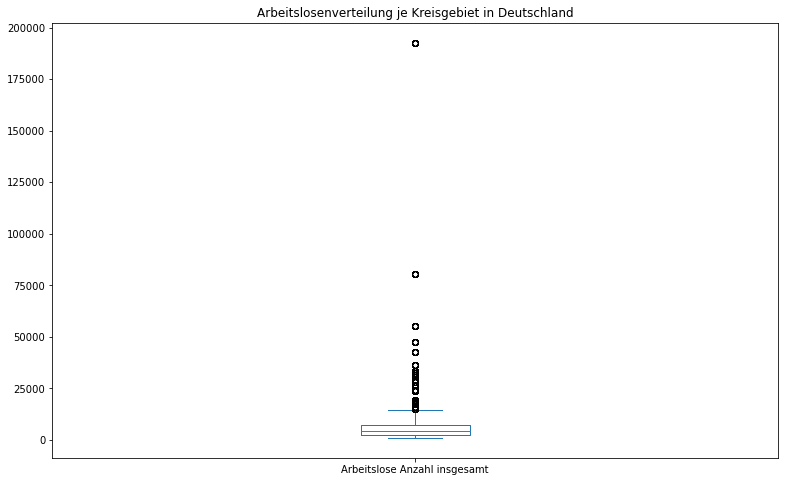

In [191]:
# Verteilung der Anzahl der Arbeitslosen insgesamt
kriminalstatistik[arbeitslosen_numerisch[0]].plot(kind='box',figsize = (13,8),
                                                title = 'Arbeitslosenverteilung je Kreisgebiet in Deutschland')

Es lässt sich feststellen, dass Kreise / Städte ab einer Arbeitslosenanzahl von ca. 20.000 die Außreißer am oberen Ende bilden. Daneben wird ein sehr starker Ausreißer von knapp unter 200.000 Arbeitslose festgestellt. Die Spanne der Arbeitslosen reicht von wenigen Hundert bis hin zu ca. 20.000 Menschen. Somit handelt es sich dabei um eine extrem rechtsschiefe Verteilung.

#### Durchschnittliche Anzahl Arbeitslose je Bundesland

<AxesSubplot:title={'center':'Durchschnittliche Anzahl Arbeitsloser in deutschen Bundesländern im Jahr 2020'}, xlabel='Bundesland'>

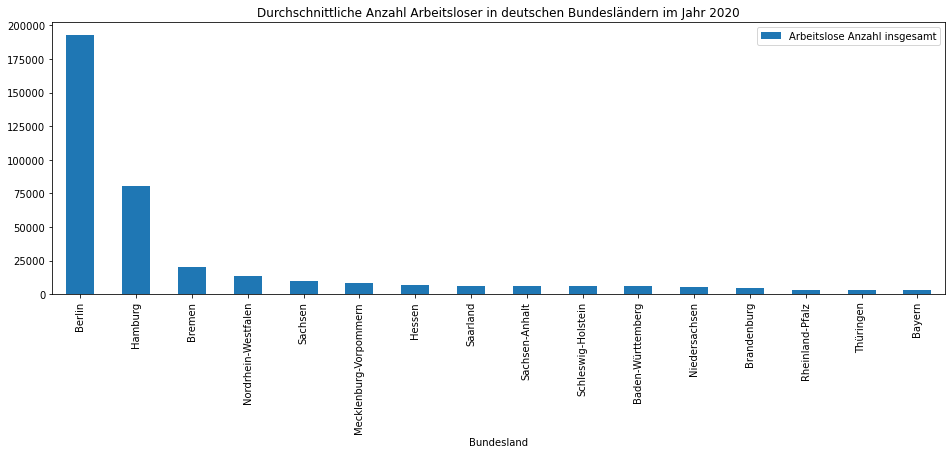

In [209]:
arbeitslose_bundesland = df_arbeitslose_ins_land_bund[['Bundesland', 'Arbeitslose Anzahl insgesamt']].groupby('Bundesland')\
                        .mean().reset_index().sort_values('Arbeitslose Anzahl insgesamt',ascending = False)

arbeitslose_bundesland.plot(kind='bar', x='Bundesland',y='Arbeitslose Anzahl insgesamt', 
                            title = 'Durchschnittliche Anzahl Arbeitsloser in deutschen Bundesländern im Jahr 2020',
                           figsize=[16,5])

Erkenntnis: Führend im Ranking der durchschnittlichen Anzahl der Arbeitslosen in einzelnen Kreisgebieten Deutschland ist mit weitem Abstand Berlin, welches damit den Ausreißer aus 3.1 begründet. Die Stadtstaaten Hamburg und Bremen folgen, jedoch mit weitem Abstand. 

Die geringeste Arbeitslosenanzahl habenThüringen und Bayern.

Insgesamt bewegt sich die Anzahl der Arbeitslosen aber - trotz Corona im Jahr 2020 - auf einem eher niedrigen Niveau.

**Anmerkung:** Das Ranking der Kriminalitätsraten führen ebenfalls Berlin, Hamburg und Bremen an. Es lässt sich daher vermuten, dass ein Zusammenhang zwischen Arbeitslosenzahlen und Kriminalitätsraten bzw. erfassten Straftatfällen herrscht. Dies soll im Folgenden nun noch einmal kurz untersucht werden.

#### Anzahl der Arbeitslosen je Kategorie für alle Bundesländer

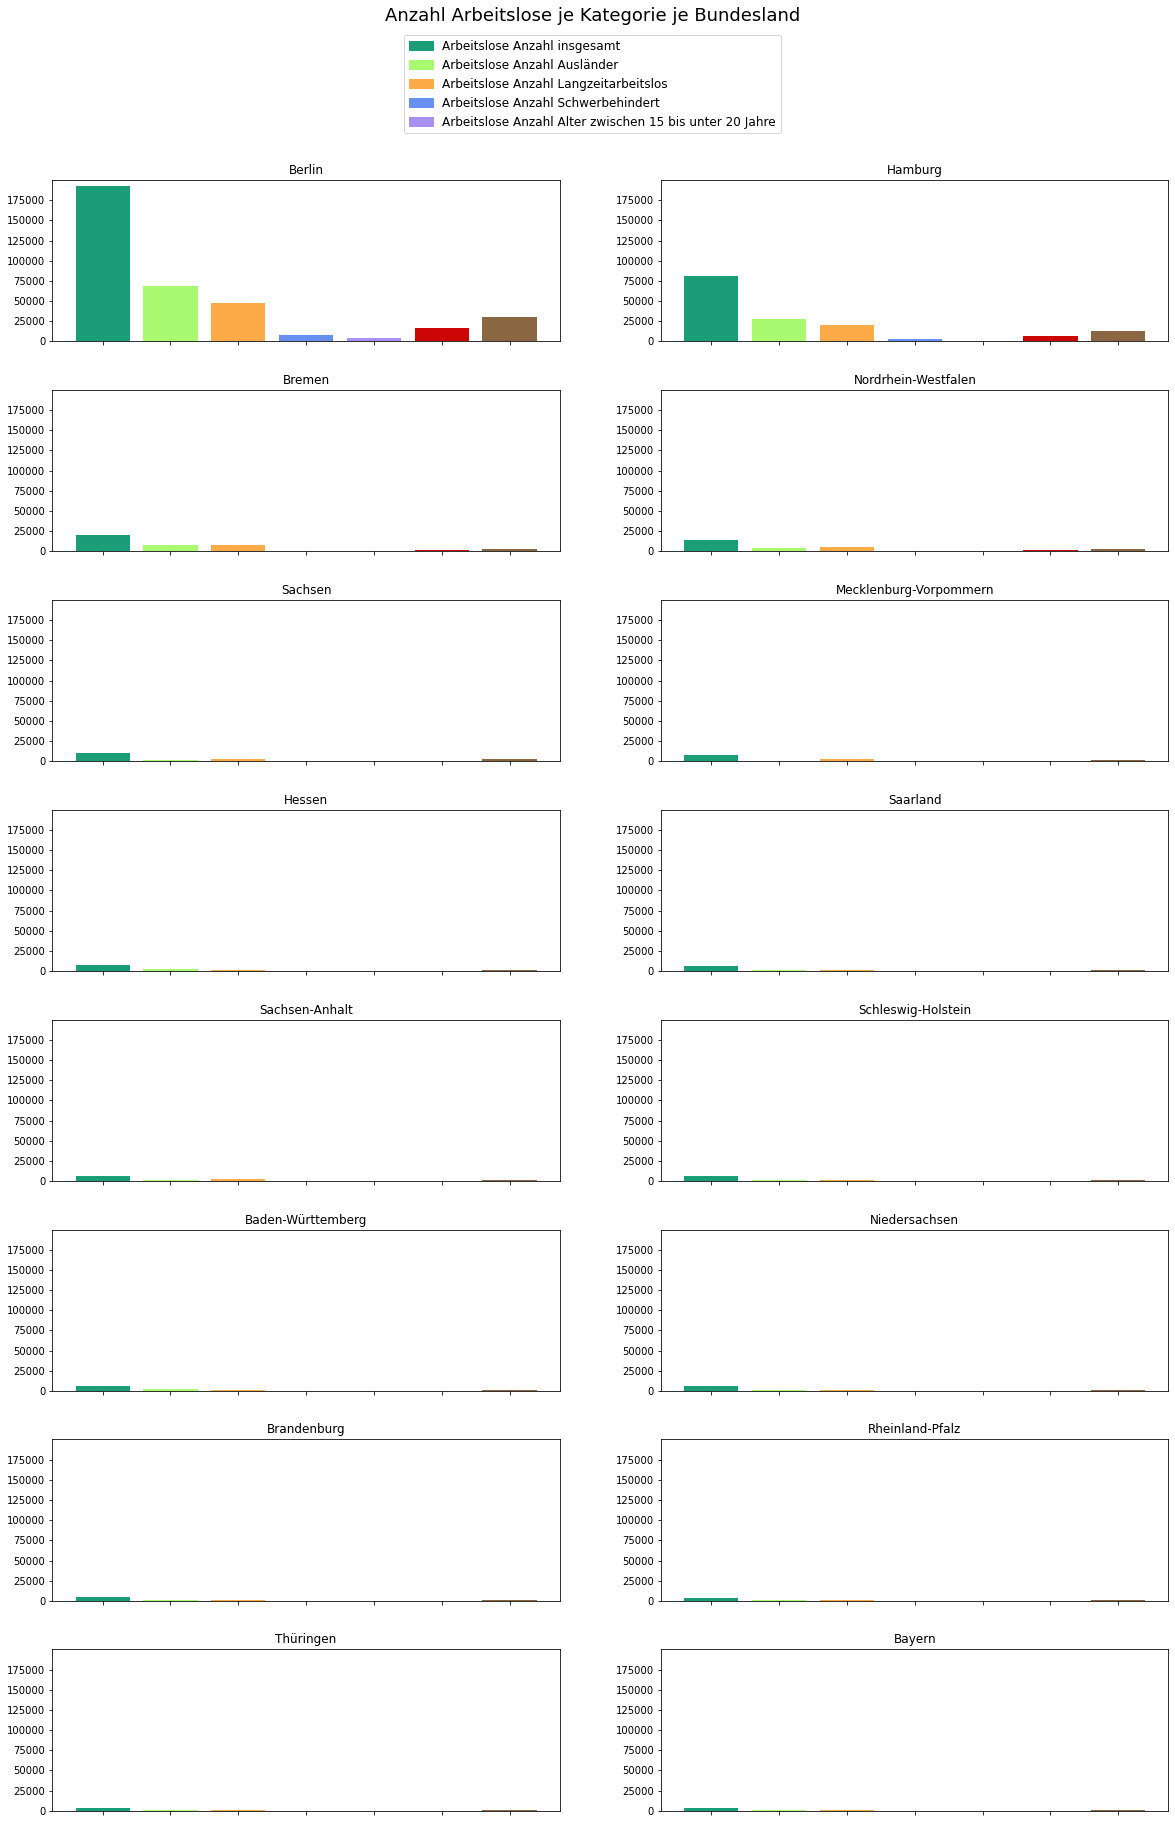

In [227]:
# Arbeitslosen je Kategorie je Bundesland

df_arbeitslose_kat_bund_1 = df_arbeitslose_kat_bund.set_index(['Bundesland']).unstack().reset_index()

df_arbeitslose_kat_bund_1.rename(columns={'level_0':'Kategorie',0:'Anzahl'},inplace=True)

df_arbeitslose_kat_bund_list = df_arbeitslose_kat_bund['Bundesland'].tolist()

df_legend_list = df_arbeitslose_kat_bund.iloc[:,1:8].columns.tolist()

## Plot

fig,axs = plt.subplots(figsize=(20,30))
plt.subplots_adjust(hspace=0.3)
plt.suptitle('Anzahl Arbeitslose je Kategorie je Bundesland', fontsize=18, y=0.96)

leg_1 = mpatches.Patch(color = '#1b9e77',label='Arbeitslose Anzahl insgesamt')
leg_2 = mpatches.Patch(color = '#a9f971',label='Arbeitslose Anzahl Ausländer')
leg_3 = mpatches.Patch(color = '#fdaa48',label='Arbeitslose Anzahl Langzeitarbeitslos')
leg_4 = mpatches.Patch(color = '#6890F0',label='Arbeitslose Anzahl Schwerbehindert')
leg_5 = mpatches.Patch(color = '#A890F0',label='Arbeitslose Anzahl Alter zwischen 15 bis unter 20 Jahre')
leg_6 = mpatches.Patch(color = '#A890F0',label='Arbeitslose Anzahl Alter zwischen 20 bis unter 55 Jahre')
leg_7 = mpatches.Patch(color = '#A890F0',label='Arbeitslose Anzahl Alter zwischen 55 bis unter 65 Jahre')

for n, i in enumerate(df_arbeitslose_kat_bund_list):
    ax = plt.subplot(8,2,n+1)
    df0=df_arbeitslose_kat_bund_1[df_arbeitslose_kat_bund_1.Bundesland==i]
    colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0','#CC0605','#8A6642']

    x = df0['Kategorie']
    y = df0['Anzahl']
    
    pp = ax.bar(x,y,color=colors)
    
    ax.set_title(i)
    ax.set_xlabel("")
    ax.set_ylim([0,200000])
    plt.tick_params('x',labelbottom=False)
    plt.yticks(np.arange(0, 200000, 25000.0))
    
    
fig.legend(handles=[leg_1,leg_2,leg_3,leg_4,leg_5], loc="upper center", markerscale=0.9, scatterpoints=1, fontsize=12,bbox_to_anchor=(0.5, 0.95))
plt.show()

#### Anzahl erfasster Straftaten in Abhängigkeit zur Anzahl der Arbeitslosen je Kategorie

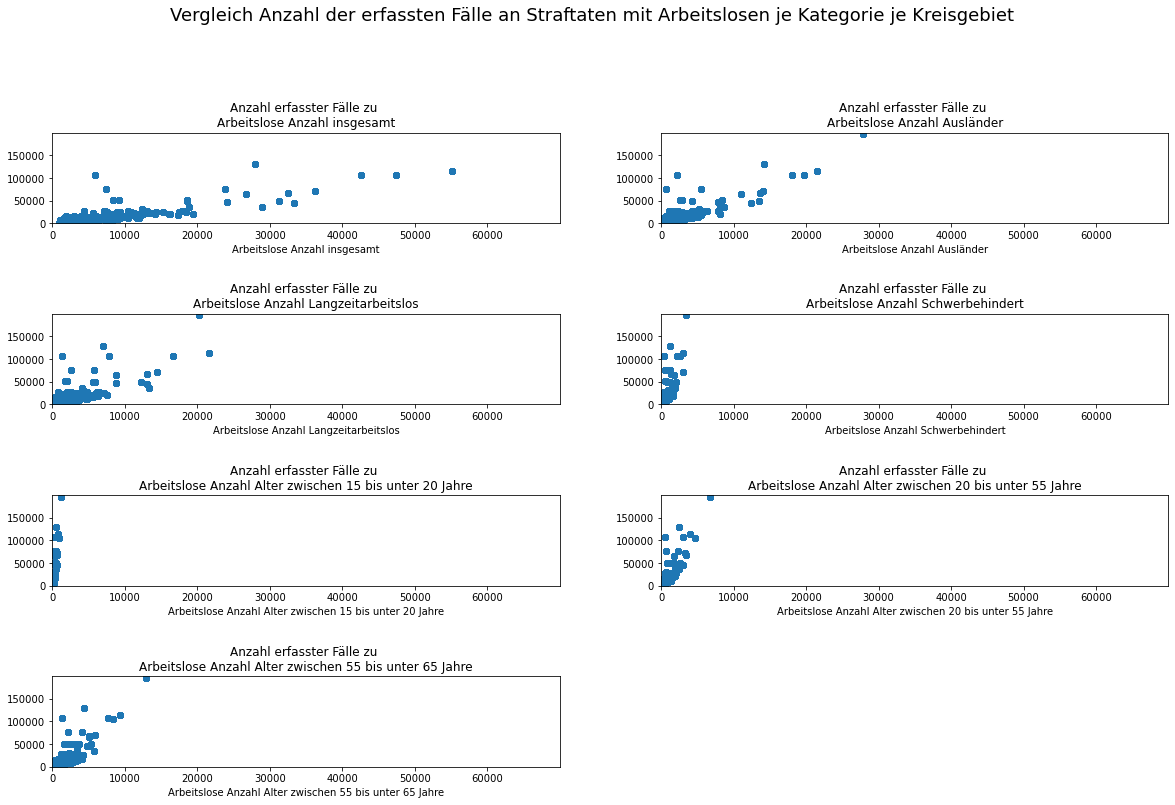

In [233]:
# Vergleich Arbeitslose je Kategorie zur Anzahl erfasster Fälle

df_landkreis_1 = df_landkreis.reset_index(drop=False)
df_arbeitslose_kat_landkreis_1 = pd.merge(df_arbeitslose_kat_land_bund,df_landkreis_1,on=['Stadt-/Landkreis'])

df_arbeitslose_list = df_arbeitslose_kat_landkreis_1.iloc[:,2:9]


## Plot

count=1
plt.subplots(figsize=(20, 25))
plt.subplots_adjust(hspace=1)
plt.suptitle('Vergleich Anzahl der erfassten Fälle an Straftaten mit Arbeitslosen je Kategorie je Kreisgebiet', fontsize=18, y=0.95)

for i in df_arbeitslose_list.columns:
    ax = plt.subplot(8,2,count)
    x = df_arbeitslose_kat_landkreis_1[i]
    y = df_arbeitslose_kat_landkreis_1['Anzahl erfasste Faelle']
    plt.scatter(x,y)
    
    ax.set_xlabel(i)
    ax.set_title('Anzahl erfasster Fälle zu '+'\n'+i)
    ax.set_xlim([0,70000])
    ax.set_ylim([0,200000])
    plt.yticks(np.arange(0, 200000, 50000.0))
    plt.xticks(np.arange(0, 70000, 10000.0))
    count+=1

plt.show()

<AxesSubplot:title={'center':'Kriminalitätsrate in Abhängigkeit zur Arbeitslosenquote bezogen auf alle zivilen Erwerbspersonen'}, xlabel='Arbeitslosenquote Prozent bezogen auf alle zivilen Erwerbspersonen', ylabel='Fälle pro Person'>

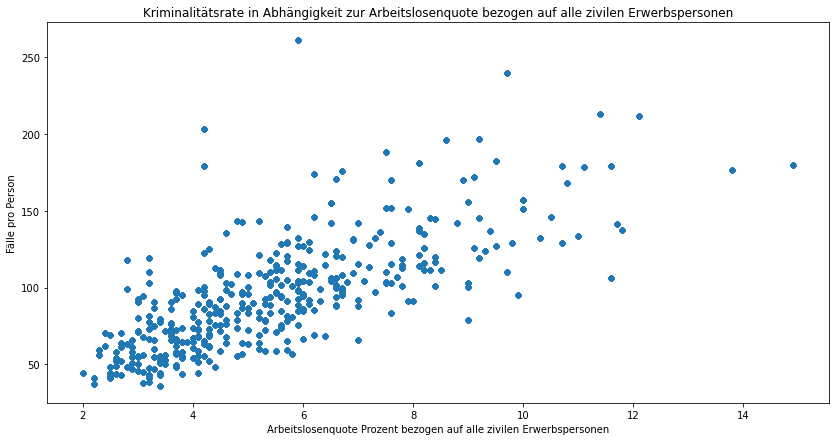

In [336]:
# Kriminalitätsrate in Abhängigkeit zur Arbeitslosenquote bezogen auf alle zivilen Erwerbspersonen

krimi_kreis = df[['Kreis_ID', 'Anzahl erfasste Faelle']].groupby('Kreis_ID').sum().reset_index()
arbeitslosenquote_erwerbspersonen_kreis = df[['Kreis_ID','Erwerbstätige im Jahresdurchschnitt Insgesamt 1000',
                                              'Arbeitslosenquote Prozent bezogen auf alle zivilen Erwerbspersonen']]
krimi_arbeitslosenquote_pp = pd.merge(krimi_kreis, arbeitslosenquote_erwerbspersonen_kreis, on = 'Kreis_ID', how = 'inner')
krimi_arbeitslosenquote_pp['Fälle pro Person'] = krimi_arbeitslosenquote_pp['Anzahl erfasste Faelle']/krimi_arbeitslosenquote_pp['Erwerbstätige im Jahresdurchschnitt Insgesamt 1000']

krimi_arbeitslosenquote_pp.plot(kind = 'scatter', x = 'Arbeitslosenquote Prozent bezogen auf alle zivilen Erwerbspersonen',
                               y = 'Fälle pro Person', title = 'Kriminalitätsrate in Abhängigkeit zur Arbeitslosenquote bezogen auf alle zivilen Erwerbspersonen',
                               figsize = [14,7])

Erkenntnis: Wie bereits oben kurz erwähnt, lässt sich ein Zusammenhang zwischen der Anzahl der Arbeitslosen und der Anzahl der erfassten Fälle an Straftaten feststellen. Dies ist sowohl über die einzelnen Kategorien der Arbeitslosenzahlen als auch beim Vergleich der Kriminalitätsrate in Abhängigkeit zur Arbeitslosenquote bezogen auf die zivilen Erwerbspersonen zu erkennen.

Es liegt insgesamt ein positiver Zusammenhang vor:
Liegt in einem Kreis oder Stadt eine erhöhte Arbeitslosigkeit vor, so werden auch mehr Straftaten erfasst. Eine niedrige Arbeitslosenquote führt zu einer geringeren Kriminalitätsrate.

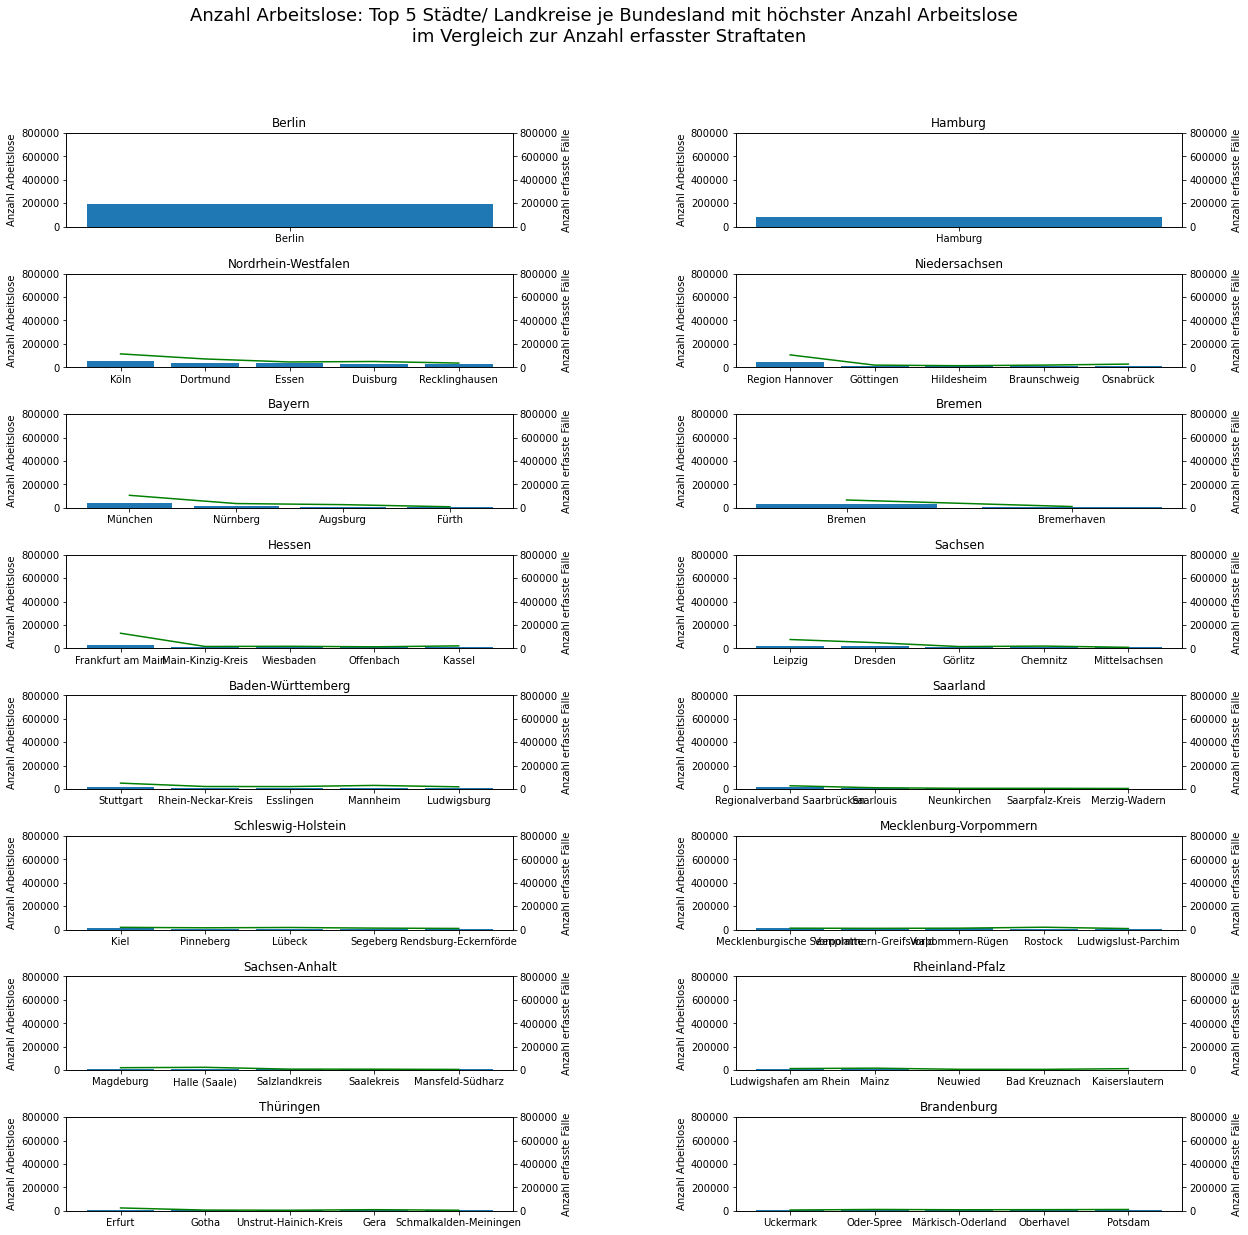

In [177]:
# Top 5 Städte / Landkreise je Bundesland mit höchster Anzahl Arbeitslose im Vergleich zur Anzahl erfasster Straftaten

df_arbeitslose_ins_land_bund_group = df_arbeitslose_ins_land_bund.sort_values('Arbeitslose Anzahl insgesamt',ascending=False)
df_arbeitslose_ins_land_bund_group_1 = df_arbeitslose_ins_land_bund_group.groupby(['Bundesland'],sort=False).head(5)

df_extract = df.loc[:,['Stadt-/Landkreis','Anzahl erfasste Faelle','Aufklaerungsquote in %']]
df_extract_1 = df_extract.groupby('Stadt-/Landkreis').agg({'Anzahl erfasste Faelle':'sum','Aufklaerungsquote in %':'mean'}).reset_index(drop=False)

df_arbeitslose_ins_land_bund_group_2 = pd.merge(df_arbeitslose_ins_land_bund_group_1,df_extract_1,on=['Stadt-/Landkreis'])

bundesland_list = df_arbeitslose_ins_land_bund_group_2['Bundesland'].drop_duplicates().tolist()

## Plot

plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.suptitle('Anzahl Arbeitslose: Top 5 Städte/ Landkreise je Bundesland mit höchster Anzahl Arbeitslose \n im Vergleich zur Anzahl erfasster Straftaten', fontsize=18, y=0.95)


for n,bundesland_list in enumerate(bundesland_list):
    ax1 = plt.subplot(10,2,n+1)
    ax2 = ax1.twinx()
    
    df0=df_arbeitslose_ins_land_bund_group_2[df_arbeitslose_ins_land_bund_group_2['Bundesland']==bundesland_list]
    
    ax1.bar(df0['Stadt-/Landkreis'],df0['Arbeitslose Anzahl insgesamt'])
    ax2.plot(df0['Stadt-/Landkreis'],df0['Anzahl erfasste Faelle'],color='green')
    
    ax1.set_title(bundesland_list)
    ax1.set_ylabel("Anzahl Arbeitslose")
    ax2.set_ylabel('Anzahl erfasste Fälle')
    ax1.set_ylim([0,800000])
    ax2.set_ylim([0,800000])

plt.show()

### Data Exploration - Fokus: Bundestagswahl 2021

In [284]:
# Sub-Datasets Wahl

wahl_numerisch = ['Wahlbeteiligung Prozent',
'Wahlberechtige Anzahl',
'Gültige Zweitstimmen Parteien CDU/CSU Anzahl',
'Gültige Zweitstimmen Parteien SPD Anzahl',
'Gültige Zweitstimmen Parteien GRÜNE Anzahl',
'Gültige Zweitstimmen Parteien FDP Anzahl',
'Gültige Zweitstimmen Parteien DIE LINKE Anzahl',
'Gültige Zweitstimmen Parteien AfD Anzahl']

# Sub-Dataset: Anzahl Wahlberechtige insgesamt je Stadt-/Landkreis und Bundesland
df_wahl_berechtigt_insg = df[['Stadt-/Landkreis',
                           'Bundesland',
                           'Wahlberechtige Anzahl']].groupby(['Stadt-/Landkreis','Bundesland']).mean().reset_index()

# Sub-Dataset: Anzahl gültige Zweitstimmen insgesamt je Stadt-/Landkreis und Bundesland
df_wahl_stimmen_insg = df[['Stadt-/Landkreis','Bundesland','Gültige Zeitstimmen Anzahl']].drop_duplicates()
df_wahl_stimmen_insg.rename(columns={'Gültige Zeitstimmen Anzahl':'Gültige Zweitstimmen Anzahl'})

# Sub-Dataset: Anzahl gültige Zweitstimmen je Partei insgesamt je Stadt-/Landkreis und Bundesland
df_wahl_stimmen_partei_bund_land = df[['Stadt-/Landkreis',
                               'Bundesland',
                               'Gültige Zweitstimmen Parteien CDU/CSU Anzahl',
                               'Gültige Zweitstimmen Parteien SPD Anzahl',
                               'Gültige Zweitstimmen Parteien GRÜNE Anzahl',
                               'Gültige Zweitstimmen Parteien FDP Anzahl',
                               'Gültige Zweitstimmen Parteien DIE LINKE Anzahl',
                               'Gültige Zweitstimmen Parteien AfD Anzahl']].drop_duplicates()

# Sub-Dataset: Anzahl gültiger Zweitstimmen je Bundesland
df_wahl_stimmen_bund_insg = df_wahl_stimmen_insg.groupby(['Bundesland']).sum().reset_index(drop=False)

# Sub-Dataset: Anzahl gültiger Zweitstimmen je Partei insgesamt je Bundesland
df_wahl_stimmen_partei_bund_insg = df_wahl_stimmen_partei_bund_land.groupby(['Bundesland']).sum().reset_index(drop=False)

# Sub-Dataset unstacked: Anzahl gültiger Zweistimmen insgesamt je Partei je Bundesland

df_wahl_stimmen_partei_bund_unstack = df_wahl_stimmen_partei_bund_insg.set_index(['Bundesland']).unstack().reset_index()
df_wahl_stimmen_partei_bund_unstack_group = df_wahl_stimmen_partei_bund_unstack.groupby(['level_0','Bundesland']).sum().sort_values(0,ascending=False).reset_index(drop=False)
df_wahl_stimmen_partei_bund_unstack_group = df_wahl_stimmen_partei_bund_unstack_group.rename(columns={'level_0':'Parteien',0:'Anzahl Zweitstimmen'})
df_wahl_stimmen_partei_bund_unstack_group['Parteien'] = df_wahl_stimmen_partei_bund_unstack_group['Parteien'].str.replace('Anzahl','')
df_wahl_stimmen_partei_bund_unstack_group['Parteien'] = df_wahl_stimmen_partei_bund_unstack_group['Parteien'].str.replace('Gültige Zweitstimmen Parteien','')

# Sub-Dataset unstacked: Anzahl gültiger Zweistimmen insgesamt je Partei 

df_wahl_stimmen_partei_unstack_group = df_wahl_stimmen_partei_bund_unstack_group.groupby(['Parteien']).sum().sort_values('Anzahl Zweitstimmen',ascending=False).reset_index(drop=False)
df_wahl_stimmen_partei_unstack_group['Parteien'] = df_wahl_stimmen_partei_unstack_group['Parteien'].str.replace('Anzahl','')
df_wahl_stimmen_partei_unstack_group['Parteien'] = df_wahl_stimmen_partei_unstack_group['Parteien'].str.replace('Gültige Zweitstimmen Parteien','')


,Stadt-/Landkreis,Bundesland,Wahlberechtige Anzahl
0,Aachen,Nordrhein-Westfalen,402726.0
1,Ahrweiler,Rheinland-Pfalz,100730.0
2,Aichach-Friedberg,Bayern,101891.0
3,Alb-Donau-Kreis,Baden-Württemberg,140560.0
4,Altenburger Land,Thüringen,74029.0


In [30]:
# Allgemeine Infos 

df_wahl = df.iloc[list(df['Straftat_Cluster']=='Straßenkriminalität'),49:58]

df_wahl.describe()

,Wahlberechtige Anzahl,Wahlbeteiligung Prozent,Gültige Zeitstimmen Anzahl,Gültige Zweitstimmen Parteien CDU/CSU Anzahl,Gültige Zweitstimmen Parteien SPD Anzahl,Gültige Zweitstimmen Parteien GRÜNE Anzahl,Gültige Zweitstimmen Parteien FDP Anzahl,Gültige Zweitstimmen Parteien DIE LINKE Anzahl,Gültige Zweitstimmen Parteien AfD Anzahl
count,4.010000e+02,401.000000,4.010000e+02,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,1.526953e+05,76.256608,1.159097e+05,27889.506234,29835.837905,17305.705736,13274.785536,5676.935162,11993.304239
std,1.661422e+05,4.150110,1.256232e+05,24278.827649,32520.587895,29251.797751,13969.950089,11821.381494,11697.563577
min,2.574700e+04,63.400000,1.830700e+04,3347.000000,3908.000000,1085.000000,1765.000000,643.000000,1809.000000
25%,8.020100e+04,74.000000,6.128700e+04,15069.000000,13528.000000,5938.000000,6014.000000,1882.000000,5993.000000
50%,1.125130e+05,76.500000,8.684300e+04,22260.000000,23058.000000,10181.000000,9800.000000,3321.000000,8958.000000
75%,1.846550e+05,79.100000,1.348660e+05,33650.000000,35651.000000,19421.000000,16243.000000,6394.000000,14206.000000
max,2.468919e+06,85.500000,1.826581e+06,289691.000000,428289.000000,408533.000000,165937.000000,209052.000000,153694.000000


In [262]:
# Anzahl Zweitstimmen insgesamt je Partei

df_wahl_stimmen_partei_unstack_group.head()

,Parteien,Anzahl Zweitstimmen
0,SPD,11964171
1,CDU/CSU,11183692
2,GRÜNE,6939588
3,FDP,5323189
4,AfD,4809315


#### Verteilung der Zweitstimmen je Kreis / Stadt

Gültige Zweitstimmen Parteien CDU/CSU Anzahl         AxesSubplot(0.125,0.125;0.110714x0.755)
Gültige Zweitstimmen Parteien SPD Anzahl          AxesSubplot(0.257857,0.125;0.110714x0.755)
Gültige Zweitstimmen Parteien GRÜNE Anzahl        AxesSubplot(0.390714,0.125;0.110714x0.755)
Gültige Zweitstimmen Parteien FDP Anzahl          AxesSubplot(0.523571,0.125;0.110714x0.755)
Gültige Zweitstimmen Parteien DIE LINKE Anzahl    AxesSubplot(0.656429,0.125;0.110714x0.755)
Gültige Zweitstimmen Parteien AfD Anzahl          AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

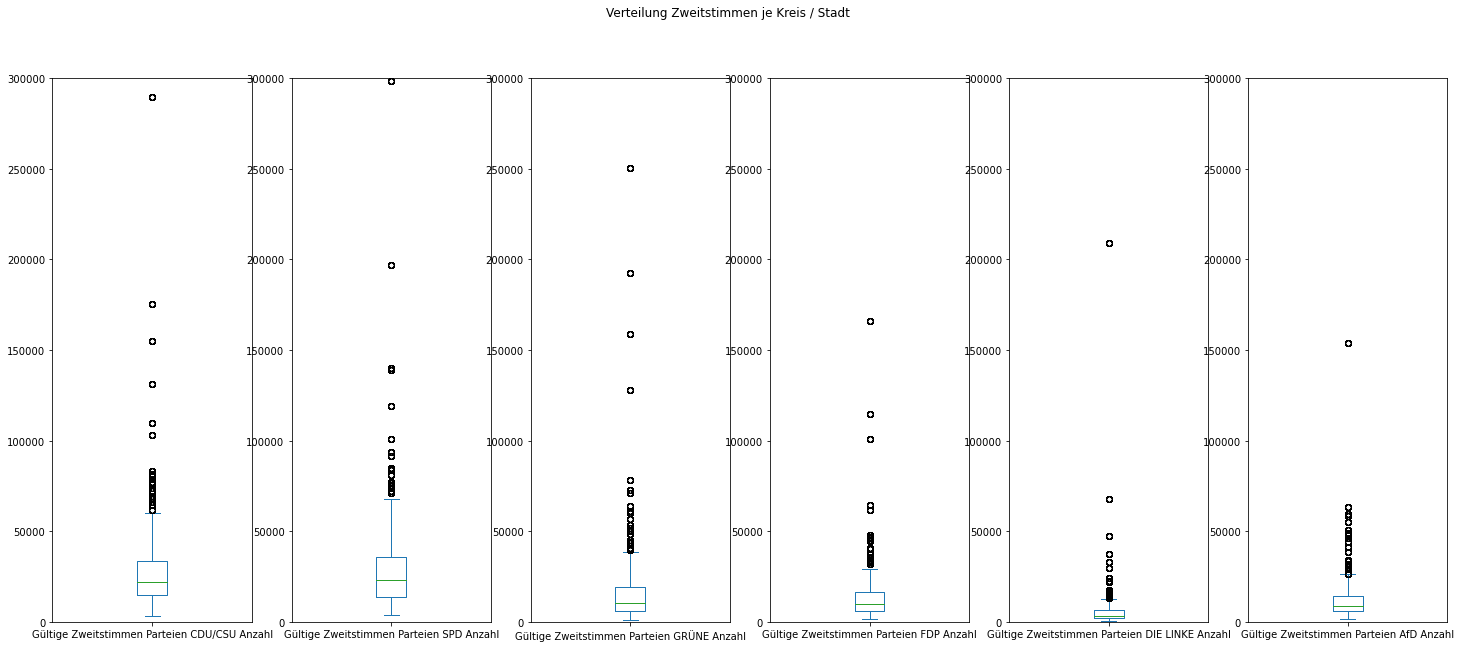

In [308]:
kriminalstatistik[wahl_numerisch[2:8]].plot(kind='box',subplots = True, figsize = [25,10],
                                            ylim = (0,300000), title = 'Verteilung Zweitstimmen je Kreis / Stadt')

Erkenntnis: Die Verteilung der Zweitstimmen je Partei der vergangenen Bundestagswahl über die deutschen Kreise und Städte ist unterschiedlich. Besitzen die großen Volksparteien (CDU/CSU und SPD) eine große Spanne (<50.000 bis hin zu > 175.000 Stimmen), verringert sich diese bei den kleineren Parteien deutlich (z.B. AfD: < 75.000 insgesamt).

#### Anzahl der Zweitstimmen je Partei je Bundesland

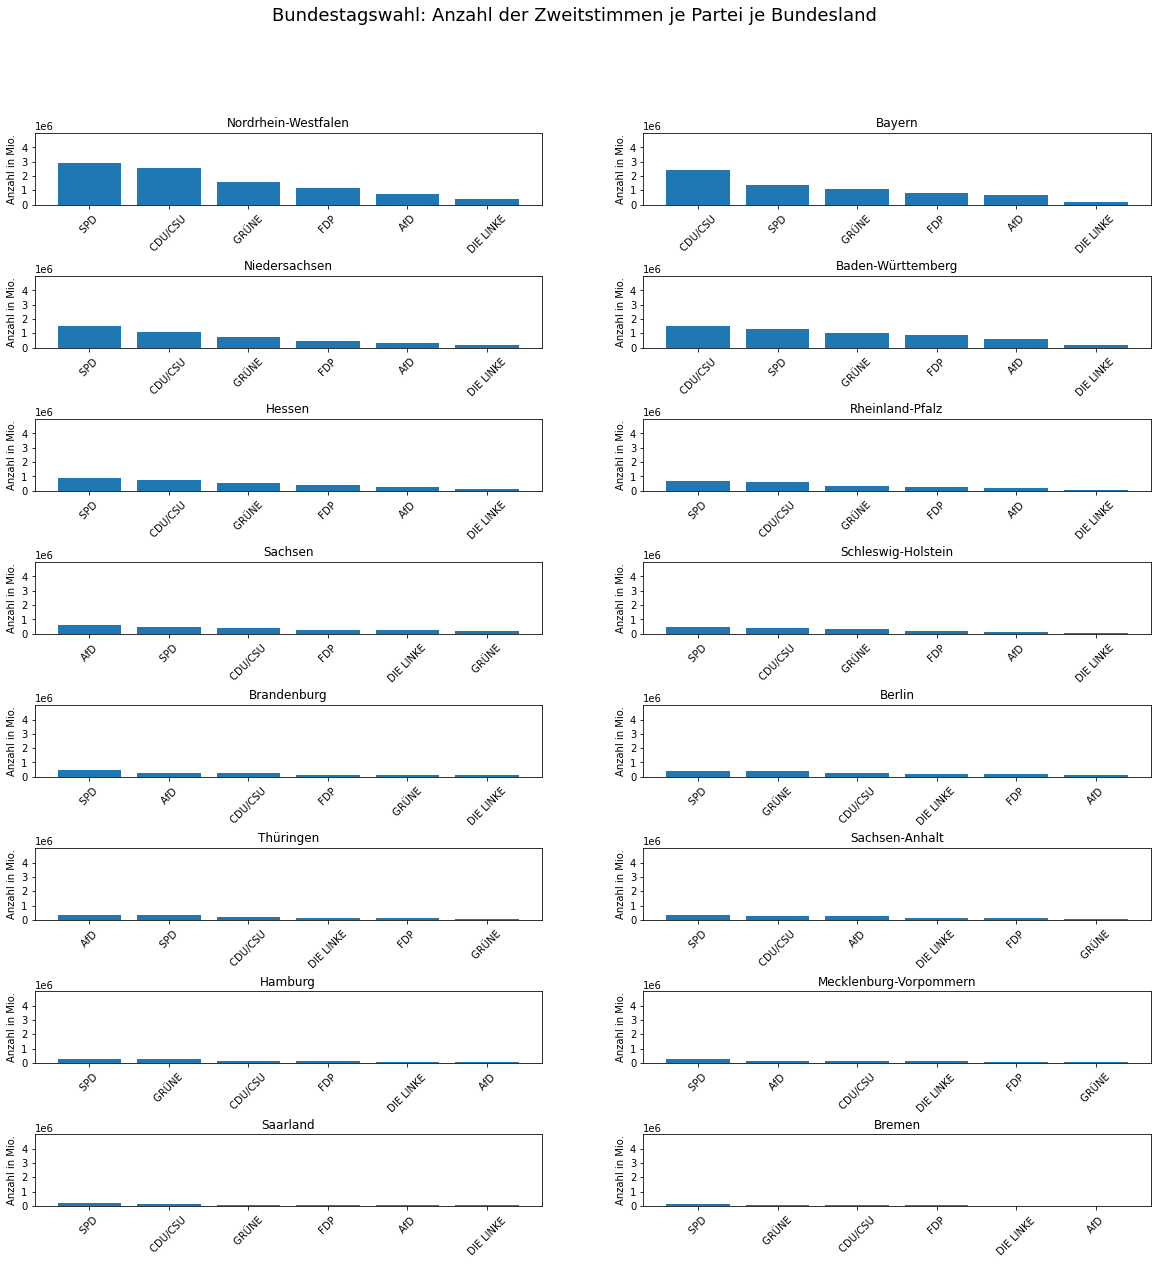

In [306]:
# Anzahl der Zweitstimmen je Partei je Bundesland

df_wahl_land_list = df_wahl_stimmen_partei_bund_unstack_group['Bundesland'].drop_duplicates().tolist()

## Plot

plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=1)
plt.suptitle('Bundestagswahl: Anzahl der Zweitstimmen je Partei je Bundesland', fontsize=18, y=0.95)


for n, bundesland_list in enumerate(df_wahl_land_list):
    ax = plt.subplot(10,2,n+1)
    
    df0=df_wahl_stimmen_partei_bund_unstack_group[df_wahl_stimmen_partei_bund_unstack_group['Bundesland']==bundesland_list]
    
    ax.bar(df0['Parteien'],df0['Anzahl Zweitstimmen'])
    ax.set_title(bundesland_list)
    ax.set_xlabel("")
    ax.set_ylabel("Anzahl in Mio.")
    ax.set_ylim([0,5000000])
    plt.yticks(np.arange(0, 5000000, 1000000.0))
    ax.tick_params('x',labelrotation=45) 
    
plt.show()

#### Wahlbeteiligung je Bundesland

Durchschnittliche Wahlbeteiligung in Gesamt DE: 75.05368948189391 %


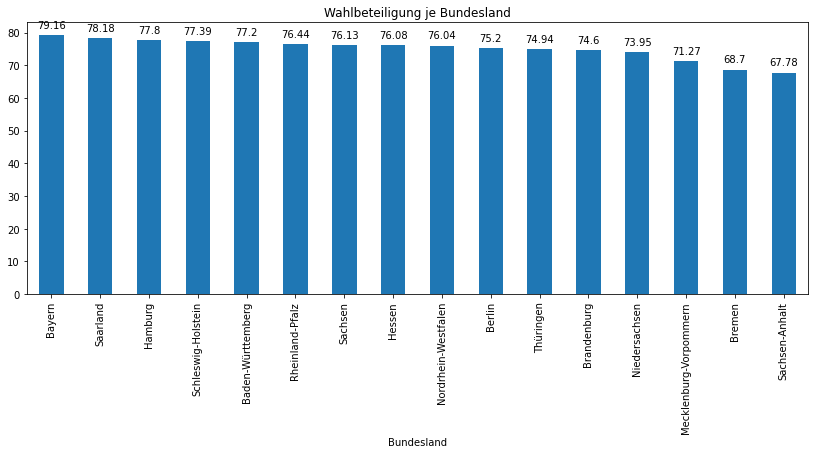

In [328]:
# Wahlbeteiligung je Bundesland

wahlbeteiligung_bund = df[['Bundesland','Wahlbeteiligung Prozent']].groupby('Bundesland').mean().reset_index().sort_values('Wahlbeteiligung Prozent',ascending = False)

ax = wahlbeteiligung_bund.plot(kind='bar',figsize = [14,5], title = 'Wahlbeteiligung je Bundesland',x = 'Bundesland',
                          y = 'Wahlbeteiligung Prozent', legend = False)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')

wahlbeteiligung_durchschnitt_gesamt = wahlbeteiligung_bund.iloc[:,1].sum()/16
print('Durchschnittliche Wahlbeteiligung in Gesamt DE: ' + str(wahlbeteiligung_durchschnitt_gesamt) + ' %')

Insgesamt ist eine recht hohe Wahlbeteiligung von durchschnittlich 75.05 % je Bundesland zu verzeichnen. 

Auffällig: Bremen und Sachsen-Anhalt stellen die Ausnahme dar. Beide Bundesländer weisen auch relativ hohe Kriminalitätsraten auf (siehe Kapitel 4.1.6). Im Folgenden soll daher nun einmal geprüft werden, ob sich Zusammenhänge zwischen der Wahlbeteiligung bzw. der Anzahl der Zweitstimmen und der Kriminalitätsrate feststellen lassen.

#### Vergleich Wahlbeteiligung je Kreisgebiet zur Kriminalitätsrate

<AxesSubplot:title={'center':'Vergleich der Wahlbeteiligung je Kreisgebiet zur Kriminalitätsrate'}, xlabel='Wahlbeteiligung Prozent', ylabel='Kriminalitätsrate'>

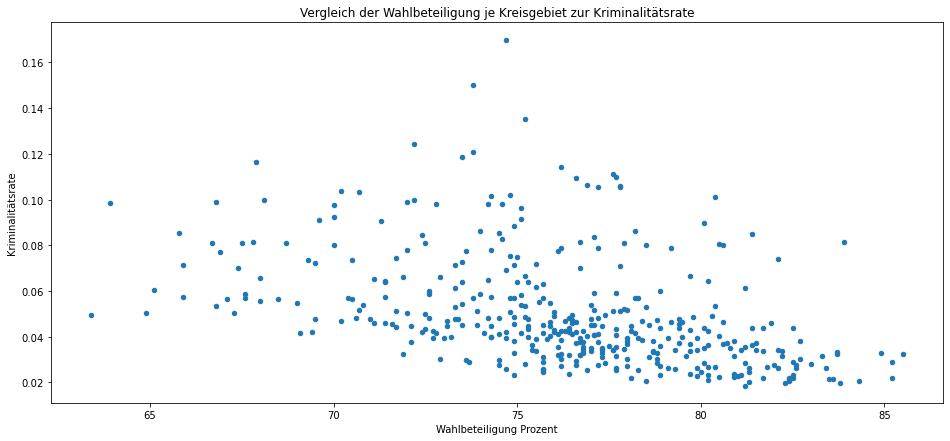

In [12]:
wahlbeteiligung_kreis = df[['Kreis_ID', 'Wahlbeteiligung Prozent', 'Bevölkerung insgesamt']].groupby('Kreis_ID').mean().reset_index()
erfasste_fälle = df[['Kreis_ID','Anzahl erfasste Faelle']].groupby('Kreis_ID').sum().reset_index()

wahlbeteiligung_fälle = pd.merge(wahlbeteiligung_kreis, erfasste_fälle, on='Kreis_ID', how = 'inner')
wahlbeteiligung_fälle['Kriminalitätsrate'] = wahlbeteiligung_fälle['Anzahl erfasste Faelle'] / wahlbeteiligung_fälle['Bevölkerung insgesamt']

wahlbeteiligung_fälle.plot(kind='scatter', x = 'Wahlbeteiligung Prozent', y = 'Kriminalitätsrate',
                          title = 'Vergleich der Wahlbeteiligung je Kreisgebiet zur Kriminalitätsrate',
                          figsize = [16,7])

Erkenntnis:

Ein Zusammenhang zwischen der Kriminalitätsrate und der Wahlbeteiligung in jedem Kreisgebiet, kann trotz einiger Ausreißer grundsätzlich angenommen werden.

Je niedriger die Wahlbeteiligung, desto größer ist tendenziell die Kriminalitätsrate bzw. erfassten Straftaten. Somit liegt ein leicht negativer Zusammenhang vor. Somit lassen sich auch die Wahlbeteiligungen in Bremen und Sachsen-Anhalt einordnen.

#### Vergleich Anzahl Zweitstimmen zur Anzahl der erfassten Straftaten bzw. Kriminalitätsrate

<AxesSubplot:title={'center':'Anzahl erfasster Straftaten in Abhängigkeit zu den gültigen Zweitstimmen der Bundestagswahl'}, xlabel='Anzahl gültiger Zweitstimmen', ylabel='Kriminalitätsrate'>

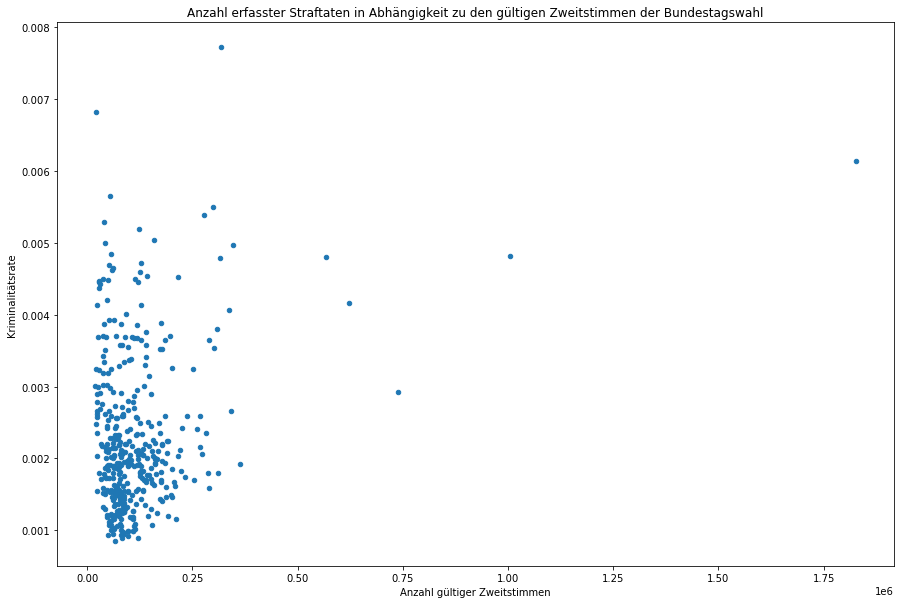

In [15]:
# Zusammenhang zwischen der Anzahl der erfassten Straftaten und der Anzahl der gültigen Zweitstimmen

kriminalität_land = df[['Kreis_ID', 'Anzahl erfasste Faelle','Bevölkerung insgesamt']].groupby('Kreis_ID').sum().reset_index()
wahl_land = df[['Kreis_ID', 'Gültige Zeitstimmen Anzahl']].groupby('Kreis_ID').mean().reset_index()
kriminalität_land_wahl = pd.merge(wahl_land, kriminalität_land, on = 'Kreis_ID', how = 'inner')
kriminalität_land_wahl['Kriminalitätsrate'] = kriminalität_land_wahl['Anzahl erfasste Faelle'] / kriminalität_land_wahl['Bevölkerung insgesamt']

kriminalität_land_wahl.plot(kind='scatter', x = 'Gültige Zeitstimmen Anzahl', y = 'Kriminalitätsrate',
                           title = 'Anzahl erfasster Straftaten in Abhängigkeit zu den gültigen Zweitstimmen der Bundestagswahl',
                           figsize = [15,10], xlabel = 'Anzahl gültiger Zweitstimmen')

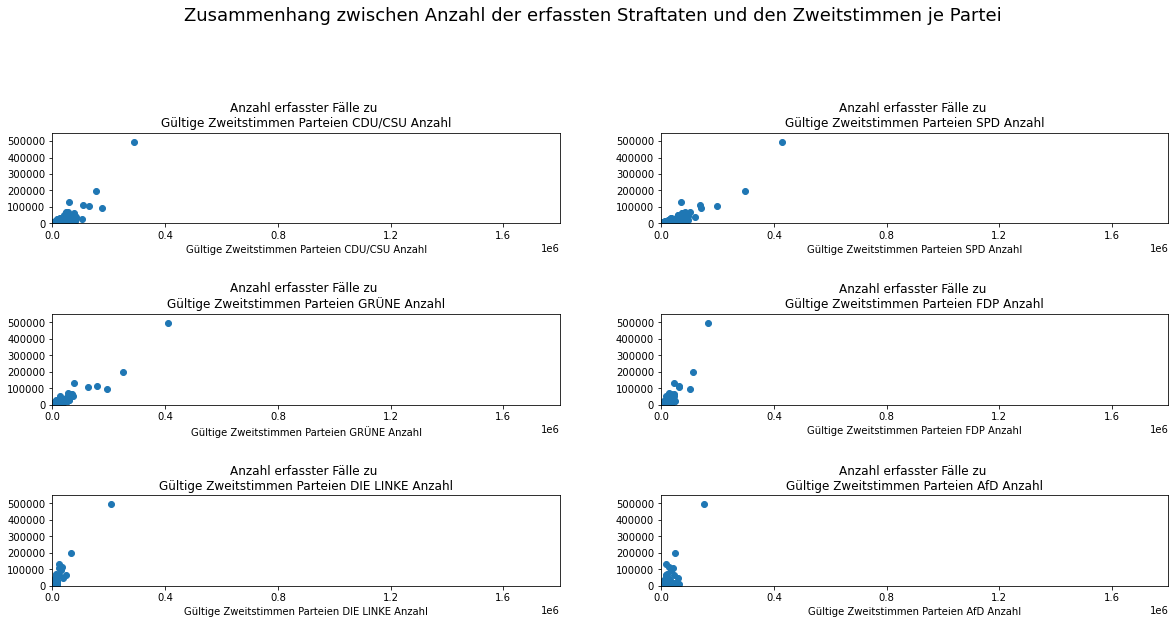

In [332]:
# Vergleich Anzahl Zweitstimmen je Partei zur Anzahl erfasster Fälle

wahl_stimmen = df[['Kreis_ID',
                  'Gültige Zweitstimmen Parteien CDU/CSU Anzahl',
                  'Gültige Zweitstimmen Parteien SPD Anzahl',
                  'Gültige Zweitstimmen Parteien GRÜNE Anzahl',
                  'Gültige Zweitstimmen Parteien FDP Anzahl',
                  'Gültige Zweitstimmen Parteien DIE LINKE Anzahl',
                  'Gültige Zweitstimmen Parteien AfD Anzahl']].groupby('Kreis_ID').mean().reset_index()
kriminalität_land_wahl_stimmen = pd.merge(kriminalität_land, wahl_stimmen, on = 'Kreis_ID', how = 'inner')

df_Parteien_list = wahl_stimmen.iloc[:,1:7]

## Plot

count=1
plt.subplots(figsize=(20, 25))
plt.subplots_adjust(hspace=1)
plt.suptitle('Zusammenhang zwischen Anzahl der erfassten Straftaten und den Zweitstimmen je Partei', fontsize=18, y=0.95)

for i in df_Parteien_list.columns:
    ax = plt.subplot(8,2,count)
    y = kriminalität_land_wahl_stimmen['Anzahl erfasste Faelle']
    x = kriminalität_land_wahl_stimmen[i]
    plt.scatter(x,y)
    
    ax.set_xlabel(i)
    ax.set_title('Anzahl erfasster Fälle zu '+'\n'+i)
    ax.set_ylim([0,550000])
    ax.set_xlim([0,1800000])
    plt.yticks(np.arange(0, 550000, 100000.0))
    plt.xticks(np.arange(0, 1800000, 400000.0))
    count+=1

plt.show()


Erkenntnisse: 

Grundsätzlich: Mit steigender Wahlbeteiligung (= Zunahme der gültigen Zweitstimmen) nimmt auch die Anzahl der Straftaten zu.
In der Detailbetrachtung der Parteien kann jedoch nicht direkt  eine Partei identifiziert werden, die  als absoluter Treiber von steigenden Straftatfällen hervorsticht. In allen Parteien nehmen mit zunehmender Anzahl Zweitstimmen auch die erfassten Fälle zu.

Ein Zusammenhang zwischen Wählerstimmen und steigenden Kriminalitätsfällen scheint zwar vorzuliegen, kann jedoch nicht ausreichend begründet werden.